# COMP- 4447: Data Science Tools 1
## Olympics and Climate Analysis
Travis Mark and Eleanore Sullivan

## Introduction: 

### Background:
The history of the Olympics goes back to Ancient Greece. Every four years, there was a sports contest at Olympia. The origin of the games is often linked to Greek mythology, specifically Zeus, Kronos, Apollo, Hermes, and Ares. The Games were revived in 1896 and the modern era of the Olympics began. 

Since the revival, more and more events have been added to the Games, including starting the winter games, and athletes from all over the world train in the hopes of winning Olympic gold. 

https://olympics.com/ioc/faq/history-and-origin-of-the-games/what-is-the-origin-of-the-olympic-games

### Literature Review:
https://www.kaggle.com/code/heesoo37/olympic-history-data-a-thorough-analysis

In this analysis, Olympic History Data: Thorough Analysis, the analyst reviewed major patterns in Olympics history. The trends of the number of competing athletes and nations, as well as the number of events in the summer and winter games were reviewed. Over time the number of athletes, nations, and events have increased in both seasons of the Olympics. In analyzing these trends, rgriffin was able to find correlations to major historical events. For example, there were two periods in which the Olympics were not held that correspond to World War I and World War II. The analyst noted that an explanation for the decrease in participation in the 1956 Melbourne Olympics could be the boycotts of Iraq, Egypt and Lebanon due to the Suez Crisis. The Netherlands, Spain, Switzerland and Cambodia did not participate because of the Hungarian Revolution and China did not compete due to the addition of Taiwan.

Women were not allowed to compete in the Olympic Games until 1900. There was not a significant increase in female olympic participation until the 1980s. Around 2010, the difference in the number of male and female athletes decreased to less than 2,000. The percentage of female athletes on the United States Olympic Team increased from approximately 12% in 1936 to over 25% in 1976 and in 2016 about 50% of the team were women. 

The geographic distribution of athletes has also changed overtime. In Amsterdam in 1928, there were a handful of countries with over 100 atheltes competing. By Rio in 2016, most of North America, South America, Europe and Asia had greater than 100 athletes competing. African countries have historically had fewer competitors but that number has been increasing. 

https://scholarworks.calstate.edu/downloads/n870zt00q

The thesis, Olympic Games Medal Count Analysis Summer and Winter Olympic Games, was prepared by Jiaxin Si. Si's analysis focused on the statistics of events, medals, hosting cities, winners' characteristics, and a gender comparison. The main data analysis portion of the thesis included a statistical model using GDP (Gross Domestic Product) and average high temperature. 

Si used a linear regression model to analyze the relationship between the number of medals and the average high temperature in winter. Jiaxin explains that, "studies have shown that differen enthnic groups in differe climate zones have their own strength sports." According to the referenced studies, different climates are more condusive to endurance activies. The conclusion from this model is that there is a linear dependence between number of medals and average high winter temperature. Moderate winter high temperatures are correlated to a higher count of medals. 

https://medium.com/nerd-for-tech/data-exploration-of-historical-olympics-dataset-2d50a7d0611d#62a6

Pandas, seaborn, matplotlib, numpy, and pandasql were used in this analysis to investigate the sex, height, weight and age of athletes and how that affects the medals won. For example, athletes with height less than 140 cm and age less than 20 years were found to have won more medals. Using a maximum height of 140 cm and maximum age of 20 years, the athletes remaining competed in diving and gymnastics. 

### Research Goals:
The goals of this project are to analyze the relationship between performance at the Olympics and the climate of the country. Do countries with hot climates perform better in the Summer Olympic Games as compared to the Winter Olympic Games? Do countries with cold climates perform better in the Winter Olympic Games than countries with hot or moderate climates?

* Look at success and participation. AKA more participation in the summer olympics for hot countries

## Data
### Data Souces:
Three data sources will be used to analyze the relationship between Olympic performance and climate: the Olympics dataset, the International Olympic Committee Code dataset, and the climate dataset. 

The Olympics dataset was downloaded from Kaggle (https://www.kaggle.com/code/chadalee/olympics-data-cleaning-exploration-prediction). The dataset includes the following columns: ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, and Medal.

The International Olympic Committee List will be used to correct NOC in the Olympics dataset. This list is from Wikipedia (https://en.wikipedia.org/wiki/List_of_IOC_country_codes). 

The climate dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv) The data set includes date, country name, average monthly temperature, and average temperature uncertainty. The original data is provided from Berkley Earth.

GitHub and the Curated Datasets project (https://github.com/datasets/geo-countries). The dataset includes the map polygons and geometry for each country as of 2018. The original source is from the Natural Earth Data website. 

### Data Processing:
First, we'll import libraries and load the olympics dataset.

In [1]:
# Import Libraries
import pandas as pd
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import numpy as np
from sklearn.cluster import KMeans
import geopandas as gpd
from matplotlib.colors import ListedColormap
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable


/Users/travismark/Documents/DU Masters/Data_Science_Tools_1_COMP_4447/dst1_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
#Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the Olympics Dataset
olympics = pd.read_csv('athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


There are over 271,000 records in the olympics data set.
The average athlete age is 25.6 years old. The minimum age is 10 and max is 97.
The average height of athletes is 175.3cm, with the interquartile range being between 168cm and 183cm.
The average weight of athletes is 70.7kg. The minum weight is 25kg and maximum is 214 kg.

In [5]:
# What are the Datatypes?
olympics.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

We need to drop some columns and change the data types of the columns we're going to use. 

In [6]:
# Drop Columns
olympics = olympics.drop(['ID', 'Height', 'Weight', 'Year', 'Season'], 
                         axis=1)

# Change Datatypes
olympics['Name'] = olympics['Name'].astype("string")
olympics['Sex'] = olympics['Sex'].astype("category")
olympics['Team'] = olympics['Team'].astype("string")
olympics['NOC'] = olympics['NOC'].astype("string")
olympics['Games'] = olympics['Games'].astype("string")
olympics['City'] = olympics['City'].astype("string")
olympics['Sport'] = olympics['Sport'].astype("string")
olympics['Event'] = olympics['Event'].astype("string")

# Check New Types
olympics.dtypes

Name     string[python]
Sex            category
Age             float64
Team     string[python]
NOC      string[python]
Games    string[python]
City     string[python]
Sport    string[python]
Event    string[python]
Medal            object
dtype: object

Now we'll look at nulls and unique values in each column.

In [7]:
# Check for Null values
olympics.isnull().sum()

Name          0
Sex           0
Age        9474
Team          0
NOC           0
Games         0
City          0
Sport         0
Event         0
Medal    231333
dtype: int64

In [8]:
# Count Unique Values
print('Name:\t', olympics['Name'].nunique(), ' unique values')
print('Sex:\t', olympics['Sex'].nunique(), '\t unique values')
print('Team:\t', olympics['Team'].nunique(), '\t unique values')
print('NOC:\t', olympics['NOC'].nunique(), '\t unique values')
print('Games:\t', olympics['Games'].nunique(), '\t unique values')
print('City:\t', olympics['City'].nunique(), '\t unique values')
print('Sport:\t', olympics['Sport'].nunique(), '\t unique values')
print('Event:\t', olympics['Event'].nunique(), '\t unique values')
print('Medal:\t', olympics['Medal'].nunique(), '\t unique values')

Name:	 134732  unique values
Sex:	 2 	 unique values
Team:	 1184 	 unique values
NOC:	 230 	 unique values
Games:	 51 	 unique values
City:	 42 	 unique values
Sport:	 66 	 unique values
Event:	 765 	 unique values
Medal:	 3 	 unique values


Let's address the null values in the age column. There are a couple ways we can do this. 
1. We can drop the null values 
2. We can replace the null values with an average

Rather than dropping the null values, let's replace them with the average age for the sport. 

In [9]:
# Calculate the Average Age for Athletes in Each Sport and Replace Nulls
olympics['Age'] = olympics['Age'].fillna(olympics.groupby('Sport')['Age'].transform('mean'))
olympics.isnull().sum()

Name          0
Sex           0
Age           0
Team          0
NOC           0
Games         0
City          0
Sport         0
Event         0
Medal    231333
dtype: int64

We still have null values in the medal column. These nulls correspond to athletes who did not win gold, silver, or bronze in their event. Let's replace these nulls with NoMedal.

In [10]:
# Replace nulls with NoMedal
olympics['Medal'] = olympics['Medal'].fillna('NoMedal')

# Set Medal Data Type to Category
olympics['Medal'] = olympics['Medal'].astype("category")

We removed the year and season columns because we can extract that information from the games column.

In [11]:
# Split Games into Year and Season
olympics[['Year', 'Season']] = olympics['Games'].str.split(' ',n=1, expand=True)

# Year should be 'int' type
olympics['Year'] = olympics['Year'].astype("int")

In [12]:
# Spot Check Records
olympics.loc[7]

Name                Christine Jacoba Aaftink
Sex                                        F
Age                                     25.0
Team                             Netherlands
NOC                                      NED
Games                            1992 Winter
City                             Albertville
Sport                          Speed Skating
Event     Speed Skating Women's 1,000 metres
Medal                                NoMedal
Year                                    1992
Season                                Winter
Name: 7, dtype: object

In [13]:
olympics.loc[491]

Name              Ibrahim Abdrabbou
Sex                               M
Age                            27.0
Team                          Egypt
NOC                             EGY
Games                   1952 Summer
City                       Helsinki
Sport                        Boxing
Event     Boxing Men's Bantamweight
Medal                       NoMedal
Year                           1952
Season                       Summer
Name: 491, dtype: object

In [14]:
olympics.loc[1212]

Name                      Julius Achon
Sex                                  M
Age                               19.0
Team                            Uganda
NOC                                UGA
Games                      1996 Summer
City                           Atlanta
Sport                        Athletics
Event     Athletics Men's 1,500 metres
Medal                          NoMedal
Year                              1996
Season                          Summer
Name: 1212, dtype: object

Now let's look at the Team and NOC fields.

In [15]:
# What values are in the Team Column?
olympics['Team'].value_counts(ascending=True)[0:9]

Team
Digby               1
Hb-20               1
Fantlet-2           1
Greenoaks Dundee    1
Newfoundland        1
Ariette-8           1
Calimucho           1
Cinara-13           1
Marsouin-26         1
Name: count, dtype: Int64

In [16]:
# What values are in the NOC Column?
olympics['NOC'].value_counts(ascending=True)[0:9]

NOC
NFL     1
NBO     2
UNK     2
SSD     3
YMD     5
TUV     7
KOS     8
TLS     9
BRU    10
Name: count, dtype: Int64

Upon review, many of the Team and NOC values above are not correct or current. We should take a look at how these match up and use the NOC list to correct them. 

In [17]:
# What Pairs of NOC and Team do we have?
olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head(10)

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
GER     43
ITA     36
CAN     32
GRE     29
DEN     29
Name: count, dtype: Int64

This summary tells us that there are 160 unique team names that are associated with the NOC code FRA. The FRA code should be France. Let's look at some of those Teams. 

In [18]:
# Filter the Dataframe
fra = olympics.query('NOC == "FRA"')

# Get Unique Team Values for the fra Dataframe
#fra['Team'].value_counts(ascending=True)[0:24]
fra['Team'].value_counts()

Team
France                                            11988
France-1                                            135
France-2                                            121
Socit Nautique de Bayonne                            19
Union des Socits Franais de Sports Athletiques       18
                                                  ...  
Carabinier-5                                          1
Camille                                               1
Freia-19                                              1
Tornade-16                                            1
Mignon-29                                             1
Name: count, Length: 160, dtype: Int64

The vast majority of the Teams in the fra dataframe are France, France-1, and France-2. The rest of the teams are associated with France so let's make sure the country is listed as France. 

To do this, we're going to join the olympics dataframe with the NOC dataframe. First, we need to load that data and do a little pre-processing. 

In [19]:
# Load the NOC dataset
noc = pd.read_csv('IOC_OlympicCommitteeCodes.csv', usecols=['Code', 'National Olympic Committee', 'Current Name'])

noc.head()

,Code,National Olympic Committee,Current Name
0,AFG,Afghanistan,Afghanistan
1,AHO,Netherlands Antilles,Netherlands Antilles
2,ALB,Albania,Albania
3,ALG,Algeria,Algeria
4,AND,Andorra,Andorra


In [20]:
# Check Types
noc.dtypes

Code                          object
National Olympic Committee    object
Current Name                  object
dtype: object

In [21]:
# Change Datatypes to string
noc['Code'] = noc['Code'].astype("string")
noc['National Olympic Committee'] = noc['National Olympic Committee'].astype("string")
noc['Current Name'] = noc['Current Name'].astype("string")

# Confirm Change
noc.dtypes

Code                          string[python]
National Olympic Committee    string[python]
Current Name                  string[python]
dtype: object

In [22]:
# Check for Null Values
noc.isnull().sum()

Code                          0
National Olympic Committee    0
Current Name                  0
dtype: int64

Dictionaries of the NOC Codes and Team Names need to be created from the NOC dataframe to clean the NOC and Team fields in the Olympics dataset.

In [23]:
# Create a Dictionary of NOC Codes and Team Names
tuples = list(zip(noc['National Olympic Committee'], noc['Code']))
noc_dict = dict(tuples)

# Create a Dictionary of Team Names and Codes
tuples = list(zip(noc['Code'], noc['Current Name']))
noc_dict2 = dict(tuples)

In [24]:
# Compare athlete['Team'] to noc['National Olympic Committee']
team_unk = []
noc_unk = []
for i in range(len(olympics)):
    if str(olympics['NOC'][i]) not in noc_dict.values():
        if olympics['Team'][i] not in team_unk:
            team_unk.append(olympics['Team'][i])
            noc_unk.append(olympics['NOC'][i])
            print(noc_unk[-1], ' ', team_unk[-1])

LIB   Lebanon
YAR   North Yemen
YMD   South Yemen
MAL   Malaya
CRT   Crete
SAA   Saar
RHO   Rhodesia
WIF   Circus
WIF   West Indies Federation
RHO   Peri
UNK   Unknown
NFL   Newfoundland
LIB   Maid of Lebanon


In [25]:
# Compare athlete['NOC'] to noc['Code']
noc_unk = []
team_unk = []
for i in range(len(olympics)):
    if str(olympics['Team'][i]) not in noc_dict2.values():
        if olympics['NOC'][i] not in noc_unk:
            noc_unk.append(olympics['NOC'][i])
            team_unk.append(olympics['Team'][i])
            #print(olympics['NOC'][i], olympics['Team'][i])
print(noc_unk)
print('-------------------------------------------------------------------------------------------------------------')
print(team_unk)

['DEN', 'USA', 'NOR', 'URS', 'GRE', 'TAN', 'YAR', 'EUN', 'JPN', 'CGO', 'FRG', 'GDR', 'ISV', 'CIV', 'FRA', 'GBR', 'RUS', 'SUI', 'TCH', 'NGR', 'GER', 'BRA', 'ARG', 'MEX', 'SWE', 'INA', 'YMD', 'FIN', 'ITA', 'SCG', 'IOA', 'CAN', 'YUG', 'BAH', 'MAL', 'IRL', 'ESP', 'GBS', 'PUR', 'TLS', 'COD', 'ROT', 'CAM', 'KOR', 'BEL', 'CRT', 'AUT', 'ROU', 'SAA', 'THA', 'LAT', 'AUS', 'BUL', 'HKG', 'MON', 'UKR', 'BLR', 'RHO', 'TPE', 'STP', 'HUN', 'POL', 'MKD', 'TTO', 'GAM', 'POR', 'TUR', 'MRI', 'ISR', 'CZE', 'RSA', 'WIF', 'NED', 'SWZ', 'IND', 'URU', 'VNM', 'ZIM', 'CHN', 'VEN', 'MAS', 'PRK', 'MYA', 'CUB', 'SGP', 'BER', 'NZL', 'SRB', 'UNK', 'EST', 'ANZ', 'NFL', 'BOH', 'PHI', 'SVK', 'JAM', 'HAI', 'COL', 'LUX', 'SLO', 'UZB', 'MLT', 'LIB', 'CHI']
-------------------------------------------------------------------------------------------------------------
['Denmark/Sweden', 'United States', 'Taifun', 'Soviet Union', 'Thessalonki-1', 'Tanzania', 'North Yemen', 'Unified Team', 'Japan-1', 'Congo (Brazzaville)', 'West

Now that we know which NOC Codes and Teams don't match our master list, we can update the codes. Over the years, country names have changed. For example, Malaya first competed in the Olympics in the summer of 1956. In the next Olympic Games, Malaya expanded and was renamed Malaysia. The original code was only used for the first games and the new code for Malaysia replaced it in 1960. Since Malaya only competed in one games with the code MAL, we will reassign MAL to MAS in the dataframe. All the records for Malaya and Malaysia will be grouped together under the current National Committee Code. The rest of the codes below, have a similar justification for the change. 

In [26]:
# Replace NOC Codes for Malaya, Crete, West Indies Federation, Newfoundland, North/South Yemen, Maid of Lebanon to Current
olympics['NOC'].replace(r'MAL', 'MAS', regex=True, inplace=True)
olympics['NOC'].replace(r'CRT', 'GRE', regex=True, inplace=True)
olympics['NOC'].replace(r'WIF', 'BWI', regex=True, inplace=True)
olympics['NOC'].replace(r'NFL', 'CAN', regex=True, inplace=True)
olympics['NOC'].replace(r'YAR', 'YEM', regex=True, inplace=True)
olympics['NOC'].replace(r'LIB', 'LBN', regex=True, inplace=True)

Let's join the olympics dataframe with the noc dataframe using the NOC column and the Code column. 

In [27]:
# Join Dataframes
olympics_noc = pd.merge(olympics, noc, how = 'left', left_on='NOC', right_on='Code')

olympics_noc.head()

,Name,Sex,Age,Team,NOC,Games,City,Sport,Event,Medal,Year,Season,Code,National Olympic Committee,Current Name
0,A Dijiang,M,24.0,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,1992,Summer,CHN,China,China
1,A Lamusi,M,23.0,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,2012,Summer,CHN,China,China
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NoMedal,1920,Summer,DEN,Denmark,Denmark
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900,Summer,DEN,Denmark,Denmark
4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedal,1988,Winter,NED,Netherlands,Netherlands


In [28]:
# Rename National Olympic Committee to Country
olympics_noc = olympics_noc.rename(columns = {'Current Name': 'Country'})

Let's look at the merge and see where we can improve the match with noc.

In [29]:
olympic_noc_null = olympics_noc[olympics_noc['Country'].isnull()]

olympic_noc_null.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head(10)

NOC
RHO    2
YMD    1
SAA    1
UNK    1
Name: count, dtype: Int64

In [30]:
# Filter the Dataframe
RHO = olympics.query('NOC == "RHO"')
YMD = olympics.query('NOC == "YMD"')
SAA = olympics.query('NOC == "SAA"')

# Get Team Values for the RHO Dataframe
RHO['Team'].value_counts()

# Get Team Values for the YMD Dataframe
YMD['Team'].value_counts()

# Get Team Values for the SAA Dataframe
SAA['Team'].value_counts()

Team
Saar    93
Name: count, dtype: Int64

As it turns out, Saar (SAA) is short for Saarland, a German state in Western Germany. South Yemen wil be grouped with North Yemen as Yemen. Rhodesia (RHO) was renamed Zimbabwe in 1980, so RHO and ZIM will also be grouped together. 

In [31]:
# Adjustments Based on History
olympics['NOC'].replace(r'SAA', 'GER', regex=True, inplace=True)
olympics['NOC'].replace(r'YMD', 'YEM', regex=True, inplace=True)
olympics['NOC'].replace(r'RHO', 'ZIM', regex=True, inplace=True)

Let's remerge the dataframes and check for nulls again. 

In [32]:
# Join Dataframes
olympics_noc = pd.merge(olympics, noc, how = 'left', left_on='NOC', right_on='Code')
olympics_noc = olympics_noc.rename(columns = {'Current Name': 'Country'})

# Check for Nulls
olympic_noc_null = olympics_noc[olympics_noc['Country'].isnull()]
olympic_noc_null.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head(10)

NOC
UNK    1
Name: count, dtype: Int64

With one remaining, we can drop the UNK row. Since we're analyzing temperature based on country, we can also drop teams that do not correspond to a specific country, such as Independent Olympic Athletes.

In [33]:
# Drop Unknown
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'UNK']

# Drop Teams Not Affiliated with a Country
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'EOR']
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'IOA']
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'IOP']
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'MIX']
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'ROT']
olympics_noc = olympics_noc[olympics_noc['NOC'] != 'ZZX']

# Strip Leading and Trailing Spaces
olympics_noc['NOC'] = olympics_noc['NOC'].str.strip()
olympics_noc['Team'] = olympics_noc['Team'].str.strip()
olympics_noc['Country'] = olympics_noc['Country'].str.strip()
olympics_noc['Code'] = olympics_noc['Code'].str.strip()

olympics_noc.dtypes

Name                          string[python]
Sex                                 category
Age                                  float64
Team                          string[python]
NOC                           string[python]
Games                         string[python]
City                          string[python]
Sport                         string[python]
Event                         string[python]
Medal                               category
Year                                   int64
Season                        string[python]
Code                          string[python]
National Olympic Committee    string[python]
Country                       string[python]
dtype: object

The last dataset we'll use in this analysis is the temperature dataset. Let's load that into a dataframe and process it so we can join it with the olympics_noc dataframe.

In [34]:
# Load temperature data
temperature = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

temperature.info()
temperature.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [35]:
temperature.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


There are over 575,000 records in the data set. 
The mean average temperature is and median is
The min temperature is and max temperature is
The first date is and last date is 9-1-2013.

Temperatures are floats in degrees Celcius. Date column is an object which needs to be converted to a date time. There are several thousand null values in the temperature fields. The data also goes back to the 1700's, which is farther back than we really need.

We will convert the date column to a date, convert the average temperature to Fahrenheit, drop null values, and retain only observations after 1900.

In [36]:
# Convert date column to datetime
temperature['Date']=temperature['dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   Date                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


In [37]:
#1900 to date
temperature=temperature[temperature['Date']>='1900-01-01']
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Date
1874,1900-01-01,-3.026,0.538,Åland,1900-01-01
1875,1900-02-01,-8.063,0.657,Åland,1900-02-01
1876,1900-03-01,-3.196,0.467,Åland,1900-03-01
1877,1900-04-01,0.781,0.224,Åland,1900-04-01
1878,1900-05-01,4.960,0.503,Åland,1900-05-01


In [38]:
# Check Nulls
temperature.isnull().sum()

dt                                  0
AverageTemperature               1050
AverageTemperatureUncertainty     311
Country                             0
Date                                0
dtype: int64

After trimming the data down to the years 1900-2013, there are 1050 missing temperature values. Let's investigate those missing values. 

In [39]:
#Display some of the observations with missing temperature values
temperature[temperature['AverageTemperature'].isnull()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Date
3238,2013-09-01,NaN,NaN,Åland,2013-09-01
5344,2013-09-01,NaN,NaN,Afghanistan,2013-09-01
7309,2013-09-01,NaN,NaN,Africa,2013-09-01
10548,2013-09-01,NaN,NaN,Albania,2013-09-01
13269,2013-09-01,NaN,NaN,Algeria,2013-09-01
...,...,...,...,...,...
566880,2013-09-01,NaN,NaN,Vietnam,2013-09-01
571878,2013-09-01,NaN,NaN,Western Sahara,2013-09-01
573531,2013-09-01,NaN,NaN,Yemen,2013-09-01
575496,2013-09-01,NaN,NaN,Zambia,2013-09-01


Each of these observations is dated 9/1/2013. What is the most recent set of observation dates?

In [40]:
# Find max date
max(temperature['Date'])

Timestamp('2013-09-01 00:00:00')

Are there other missing date values?

In [41]:
# Find Null Values by Date
temperature[temperature['AverageTemperature'].isnull()].groupby('Date').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,,
1900-01-01,2,0,0,2
1900-02-01,2,0,0,2
1900-03-01,2,0,0,2
1900-04-01,2,0,0,2
1900-05-01,2,0,0,2
...,...,...,...,...
2013-05-01,1,0,1,1
2013-06-01,1,0,1,1
2013-07-01,1,0,1,1


222 of 243 of the observations for 9/1/2013 contain missing temperature values. This could indicate incomplete data for 9/1/2013. Due to the high rate of missing values for 9/1/2013 and it being the last date in the data set, we will drop observations related to September 2013.

In [42]:
temperature=temperature[temperature['Date']!='2013-09-01']
temperature['AverageTemperature'].isnull().sum()

828

We still have 828 other missing values. Are these missing data common in certain countries?

In [43]:
temperature[temperature['AverageTemperature'].isnull()].groupby('Country').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Date
Country,,,,
Antarctica,763,0,739,763
Federated States Of Micronesia,30,0,0,30
French Polynesia,6,0,0,6
French Southern And Antarctic Lands,4,0,0,4
Heard Island And Mcdonald Islands,4,0,0,4
Palau,20,0,0,20
South Georgia And The South Sandwich Isla,1,0,0,1


Antarctica is the source of the majority of the missing temperature values. The continent of Antarctica is not a country we are concerned with determining the climate and will be dropped. The other missing values are concentrated to a handful of small, mostly island nations.
Let's look more closely at the missing data to determine if there is a pattern.

In [44]:
temperature[(temperature['Country']=='French Southern And Antarctic Lands') & (temperature['AverageTemperature'].isnull())]
#French Southern And Antarctic Lands is missing the first 2 months of observations recorded for it and then two in a row the following year.
#Backfill or drop

temperature[(temperature['Country']=='Federated States Of Micronesia') & (temperature['AverageTemperature'].isnull())]
#Federated States Of Micronesia is missing the first 2 full years of observations and then a string of 7 months in a row.
#Drop these

temperature[(temperature['Country']=='French Polynesia') & (temperature['AverageTemperature'].isnull())]
#French Polynesia is missing the first 4 observations and then 2 other nonconsecutive
#Fill or drop

temperature[(temperature['Country']=='Heard Island And Mcdonald Islands') & (temperature['AverageTemperature'].isnull())]
#Similar to the French Southern Lands, Heard Island And Mcdonald Islands is missing the first 2 months and then 2 more next year

temperature[(temperature['Country']=='Palau') & (temperature['AverageTemperature'].isnull())]
#Palau is missing almost all the observations in the first 2 years.
#Drop these

temperature[(temperature['Country']=='South Georgia And The South Sandwich Isla') & (temperature['AverageTemperature'].isnull())]['Date'].min()
#South Georgia And The South Sandwich Isla is missing it's first observation
#Drop or backfill

Timestamp('1902-12-01 00:00:00')

### Missing Data
After looking more closely at the observations mssing temperature data, we can see that most of the missing temperatures are consecutive and early in the 1900's, prior to these nations reporting regular data. The Federated States of Micronesia and Palau are missing the first 2 full years of data. The countries of French Southern And Antarctic Lands, French Polynesia, and Heard Island And Mcdonald Islands are issing the first 2 to 4 observations and then 2 observations in the second year.  
One option for handling these values would be to fill them with the average temperature for the country of the remaining observations.
Ulitmately, we will be calculating the overall average temperature of each country in order to categorize them into climates. Since we will be calculating the overall average, we are choosing not to fill theses missing values the country's average temperature, as this could impact the overall average temperature by filling them with less variant data.  
Another option could be filling the missing values by backfilling data or filling them with the average of the temperature from the month preceding and succeeding it. However, as discussed above, serveral of the countries missing data are missing a large number of subsequent data. So, backfilling data would mean filling the same value into potentially 24 or so continuous observations. Also, because it would stand to reason there is seasonal vairability between say December and July, filling those missing values with the same number does not make much sense.
To resolve the issue of seasonality in the data, we could fill them with the average of the month preceeding and succeeding it. However a similarly problem for filling data with the average of the value ahead and behind it is encountered where there is a large string of missing data and no first value before the missing data to use in a calculation.  
After considering these option, and keeping in mind we would ultimately be averaging the full data for each country,we decided the best solution would be to simply drop the remaining missing values.

In [45]:
# Drop NAs
temperature.dropna(inplace=True)

# Drop the Old dt Column with String Date
temperature.drop(columns='dt', inplace=True)
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328797 entries, 1874 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   AverageTemperature             328797 non-null  float64       
 1   AverageTemperatureUncertainty  328797 non-null  float64       
 2   Country                        328797 non-null  object        
 3   Date                           328797 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.5+ MB


Temperature is currently in Celcius. Let's convert it to Fahrenheit.

In [46]:
#Convert Temperature to Fahrenheit
temperature['Avg Temp Fahrenheit']=temperature['AverageTemperature'].apply(lambda x: (x*1.8)+32)
temperature.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Date,Avg Temp Fahrenheit
1874,-3.026,0.538,Åland,1900-01-01,26.5532
1875,-8.063,0.657,Åland,1900-02-01,17.4866
1876,-3.196,0.467,Åland,1900-03-01,26.2472
1877,0.781,0.224,Åland,1900-04-01,33.4058
1878,4.960,0.503,Åland,1900-05-01,40.9280


Now let's calculate the average temperature for each country. 

In [47]:
#Calculate average temperature for each country
country_temps=temperature.groupby('Country')['Avg Temp Fahrenheit'].mean()
country_temps
print(country_temps.nlargest(10))
print(country_temps.nsmallest(10))

Country
Djibouti                83.986774
Mali                    83.514618
Burkina Faso            82.917629
Senegal                 82.634104
Aruba                   82.618064
United Arab Emirates    82.177783
Mauritania              82.016101
Gambia                  81.858790
Niger                   81.703632
Curaçao                 81.598401
Name: Avg Temp Fahrenheit, dtype: float64
Country
Greenland                                    -0.734238
Denmark                                       0.221670
Svalbard And Jan Mayen                       19.265252
Russia                                       22.698298
Canada                                       23.444835
Mongolia                                     31.074110
Norway                                       32.842550
South Georgia And The South Sandwich Isla    34.581059
Finland                                      35.003499
Iceland                                      35.197170
Name: Avg Temp Fahrenheit, dtype: float64


Looking at the countries with average temperatures under 40 degrees, we see that North America is listed. 

In [48]:
country_temps[country_temps<=40].nlargest(15)

Country
Tajikistan                                   39.685596
Kyrgyzstan                                   38.281566
Sweden                                       36.971802
Heard Island And Mcdonald Islands            36.611807
North America                                36.391026
Iceland                                      35.197170
Finland                                      35.003499
South Georgia And The South Sandwich Isla    34.581059
Norway                                       32.842550
Mongolia                                     31.074110
Canada                                       23.444835
Russia                                       22.698298
Svalbard And Jan Mayen                       19.265252
Denmark                                       0.221670
Greenland                                    -0.734238
Name: Avg Temp Fahrenheit, dtype: float64

The data contains continent values and some European countries have multiple entries. We will need to remove the continents and extra entries for European countries.

In [49]:
country_temps[country_temps.index.str.contains(r'\(Europe\)')]

Country
Denmark (Europe)           46.677595
France (Europe)            51.243013
Netherlands (Europe)       48.958491
United Kingdom (Europe)    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

In [50]:
# Entries for Continents
country_temps[country_temps.index.isin(['North America', 'South America', 'Africa', 'Europe', 'Asia','Antarctica', 'Åland', 'Western Sahara', 'France', 'France (Europe)'])]

# European Countries with Multiple Entries
country_temps[country_temps.index.isin(['France','France (Europe)','Denmark (Europe)','Denmark','Netherlands (Europe)','Netherlands','United Kingdom (Europe)','United Kingdom'])]

Country
Denmark                     0.221670
Denmark (Europe)           46.677595
France                     55.509471
France (Europe)            51.243013
Netherlands                49.665093
Netherlands (Europe)       48.958491
United Kingdom             47.786381
United Kingdom (Europe)    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

Appears as those the "Europe" countries are a little cooler, indicating the non-Europe measurements might be worldwide including territorial locations. We'll drop the territorial measurements and then rename the "Europe" observations to remove the "Europe" tag. We will also remove the continents aggregations from the data.

In [51]:
#Remove continents, regions, and colonial areas
country_temps=country_temps[~country_temps.index.isin(['North America', 'South America', 'Africa', 'Europe', 'Asia','Antarctica', 'Åland', 'France','Denmark','Netherlands','United Kingdom'])]
#Rename the European countries which had separate worldwide measurements
country_temps.index=country_temps.index.map(lambda x: x.replace(' (Europe)', '') if '(Europe)' in x else x)

#Validate
country_temps[country_temps.index.isin(['France','France (Europe)','Denmark (Europe)','Denmark','Netherlands (Europe)','Netherlands','United Kingdom (Europe)','United Kingdom'])]

Country
Denmark           46.677595
France            51.243013
Netherlands       48.958491
United Kingdom    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

We will have a little more processing to do as we move forward with the exploratory data analysis phase and the analysis to answer our research questions.

## Exploratory Data Analysis:
Let's start with the Olympics dataset (that has been joined with the NOC list) and see what the data looks like with some initial visualizations. 

### Data Visualizations:
To answer our research questions we'll need to look at summer and winter events, specifically which countries had more participation and more successes (medals). 

In [52]:
# Divide the Dataframe into Summer and Winter
summer = olympics_noc.query('Season == "Summer"')
winter = olympics_noc.query('Season == "Winter"')

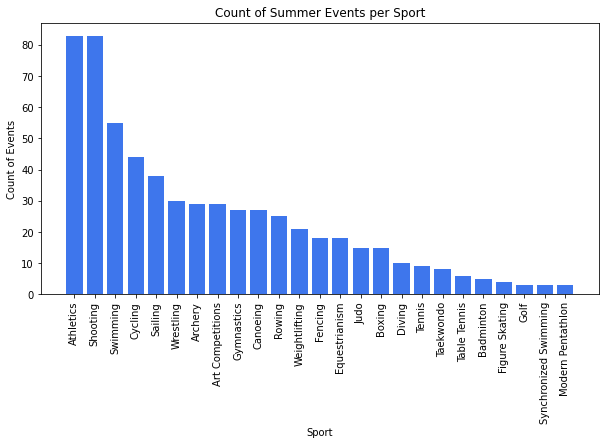

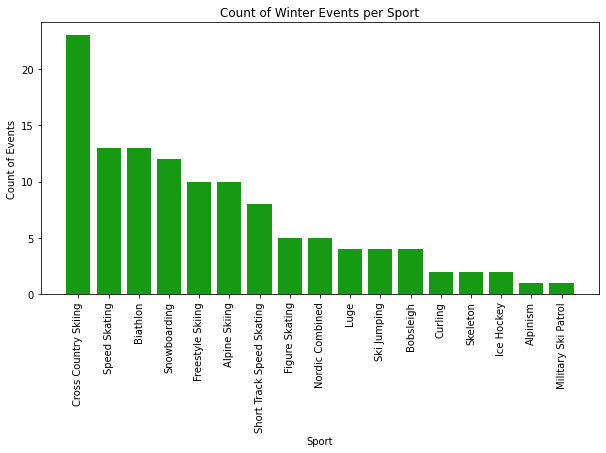

In [53]:
# Histogram of Summer Events per Sport
event_counts = summer.groupby('Sport')['Event'].nunique()
event_counts = event_counts.sort_values(ascending=False)
event_counts = event_counts[:25]
fig= plt.subplots(figsize=(10, 5))
plt.bar(event_counts.index, event_counts.values, color='#3e76ec')
plt.xlabel('Sport')
plt.ylabel('Count of Events')
plt.title('Count of Summer Events per Sport')
plt.xticks(rotation = 90)
plt.show()

# Histogram of Winter Events per Sport
event_counts = winter.groupby('Sport')['Event'].nunique()
event_counts = event_counts.sort_values(ascending=False)
event_counts = event_counts[:25]
fig= plt.subplots(figsize=(10, 5))
plt.bar(event_counts.index, event_counts.values, color='#179a13')
plt.xlabel('Sport')
plt.ylabel('Count of Events')
plt.title('Count of Winter Events per Sport')
plt.xticks(rotation = 90)
plt.show()

Each plot shows the top 25 sports, but since winter had only 17 sports all winter sports are shown. The summer Olympics are older than the winter Olympics and have significantly more events. Note that in addition to far more events at the summer games, there are more team sports (Basketball, Soccer, Handball, Water Polo) at the summer games while Hockey is the only large team sport with most other sports being individual. The ratio between number of events and number of team sports between the two seasons will likely skew the participation results.

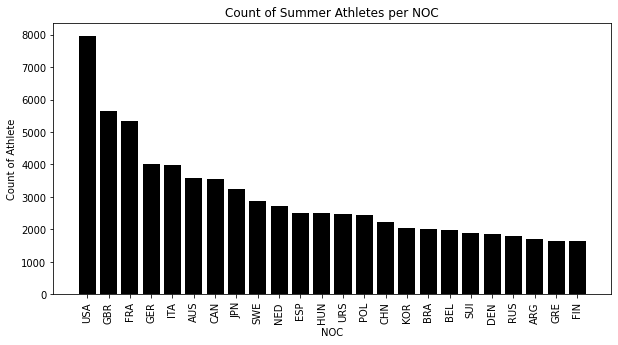

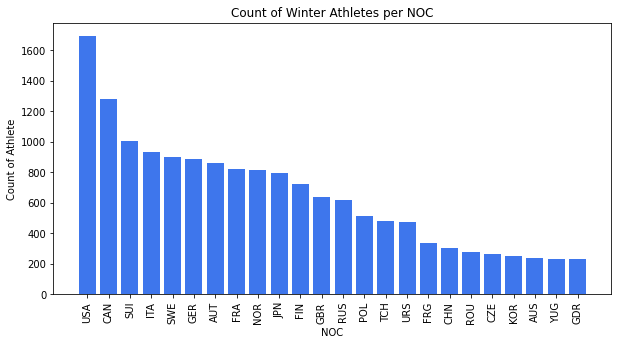

In [54]:
# Country Summer Participation Histogram
athlete_counts = summer.groupby('NOC')['Name'].nunique()
athlete_counts = athlete_counts.sort_values(ascending=False)
athlete_counts = athlete_counts[0:24]
fig= plt.subplots(figsize=(10, 5))
plt.bar(athlete_counts.index, athlete_counts.values, color='#000000')
plt.xlabel('NOC')
plt.ylabel('Count of Athlete')
plt.title('Count of Summer Athletes per NOC')
plt.xticks(rotation = 90)
plt.show()

# Country Winter Participation Histogram
athlete_counts = winter.groupby('NOC')['Name'].nunique()
athlete_counts = athlete_counts.sort_values(ascending=False)
athlete_counts = athlete_counts[0:24]
fig= plt.subplots(figsize=(10, 5))
plt.bar(athlete_counts.index, athlete_counts.values, color='#3e76ec')
plt.xlabel('NOC')
plt.ylabel('Count of Athlete')
plt.title('Count of Winter Athletes per NOC')
plt.xticks(rotation = 90)
plt.show()

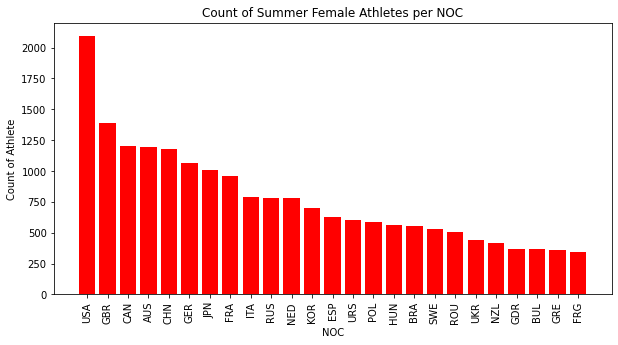

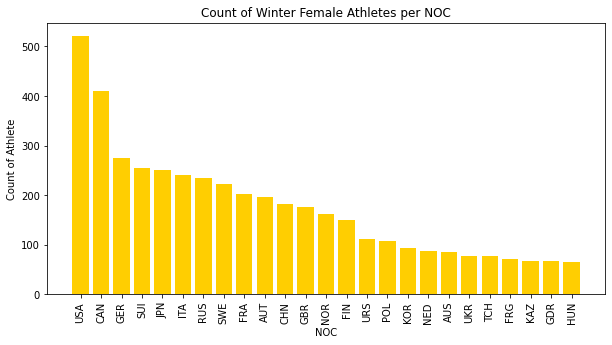

In [55]:
# Female Summer Participation Histogram
athlete_counts = summer[summer['Sex']=='F'].groupby('NOC')['Name'].nunique()
athlete_counts = athlete_counts.sort_values(ascending=False)
athlete_counts = athlete_counts[:25]
fig= plt.subplots(figsize=(10, 5))
plt.bar(athlete_counts.index, athlete_counts.values, color='#ff0000')
plt.xlabel('NOC')
plt.ylabel('Count of Athlete')
plt.title('Count of Summer Female Athletes per NOC')
plt.xticks(rotation = 90)
plt.show()

# Female Winter Participation Histogram
athlete_counts = winter[winter['Sex']=='F'].groupby('NOC')['Name'].nunique()
athlete_counts = athlete_counts.sort_values(ascending=False)
athlete_counts = athlete_counts[:25]
fig= plt.subplots(figsize=(10, 5))
plt.bar(athlete_counts.index, athlete_counts.values, color='#ffce01')
plt.xlabel('NOC')
plt.ylabel('Count of Athlete')
plt.title('Count of Winter Female Athletes per NOC')
plt.xticks(rotation = 90)
plt.show()

The top 25 countries are shown in each plot. The first female athletes to compete in the Olympics competed in 1900. The number of female athletes has increased substantially over the last 120 years. In 1908, 44 women competed in the Summer Olympics. By 2016, that count increased to 5026. In 1924, 13 women competed in the Winter Olympics. That number grew to 1102 women in 2014. Figures 5 and 6 highlight female participation in the Summer and Winter Games. Again, showing the top 25 countries by count. The United States has the most athletes in both the summer and the winter, and also the most female athletes in both seasons. The summer has 2097 United States women and the winter has 522. Participation in the winter is about 20% of what it was in the summer for the overall athlete count. Female participation in the winter is approximately 25% of the summer totals. 

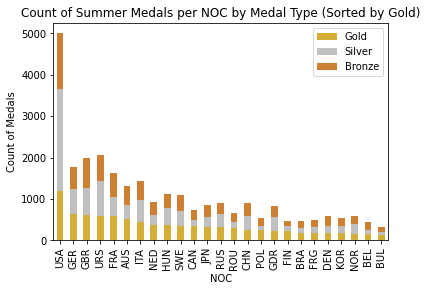

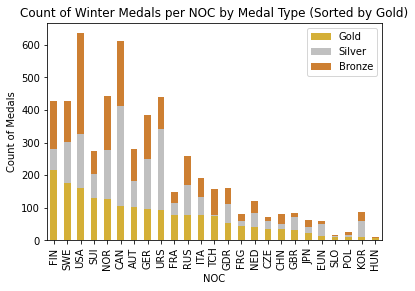

In [56]:
# Summer Medals Stacked
summer_nomed = summer
summer_nomed = summer_nomed.loc[summer_nomed['Medal'] != 'NoMedal']
medal_counts = summer_nomed.groupby('NOC')['Medal'].value_counts().unstack(fill_value=0)
medal_counts.drop('NoMedal', axis=1, inplace=True)
medal_counts.columns = ['Gold', 'Silver', 'Bronze']
medal_counts = medal_counts.sort_values(by='Gold', ascending=False)
medal_counts = medal_counts.iloc[:25]
colors = ['#d4af37', '#c0c0c0', '#cd7f32']
medal_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('NOC')
plt.ylabel('Count of Medals')
plt.title('Count of Summer Medals per NOC by Medal Type (Sorted by Gold)')
plt.xticks(rotation=90)
plt.show()

#Winter Medals Stacked
winter_nomed = winter
winter_nomed = winter_nomed.loc[winter_nomed['Medal'] != 'NoMedal']
medal_counts = winter_nomed.groupby('NOC')['Medal'].value_counts().unstack(fill_value=0)
medal_counts.drop('NoMedal', axis=1, inplace=True)
medal_counts.columns = ['Gold', 'Silver', 'Bronze']
medal_counts = medal_counts.sort_values(by='Gold', ascending=False)
medal_counts = medal_counts.iloc[:25]
colors = ['#d4af37', '#c0c0c0', '#cd7f32']
medal_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('NOC')
plt.ylabel('Count of Medals')
plt.title('Count of Winter Medals per NOC by Medal Type (Sorted by Gold)')
plt.xticks(rotation=90)
plt.show()

Summer and winter stacked bar charts showing the count of gold, silver, and bronze medals that a country won. The top performing country based on number of gold medals and number of total medals for the Summer Olympics is the United States. The Winter Olympics has two top performers, Finland for count of gold medals and the United States for total medal count.

#### What atheletes have competed in the most games?

In [57]:
olympics.groupby('Name')['Year'].nunique().nlargest(3)

Name
Ian Millar           10
Afanasijs Kuzmins     9
Hubert Raudaschl      9
Name: Year, dtype: int64

Ian Millar competed in 10 years of games and Afanasijs Kuzmins and Hubert Raudaschl both competed in 9 years.  
Ian Millar was a Canadian equestrian competing in the Olympics from 1972 to 2012. He earned one silver medal at the 2008 games. In his final year, he was age 65 years old.  
Afanasijs Kuzmins competed in Shooting sports for both the Soviet Union and Latvia between 1976 and 2012. He earned a gold medal in 1988 and a silver at the 1992 games. In his final year, he was also 65.  
Hubert Raudaschl competed for Austria in Sailing between 1964 and 1996. He earned silver medals at both the 1968 and 1980 games.

In [58]:
olympics[olympics['Name'].isin(['Ian Millar','Afanasijs Kuzmins', 'Hubert Raudaschl'])][['Name','Age', 'Team', 'Games', 'Sport', 'Event', 'Medal']]

,Name,Age,Team,Games,Sport,Event,Medal
129860,Afanasijs Kuzmins,29.0,Soviet Union,1976 Summer,Shooting,"Shooting Mixed Rapid-Fire Pistol, 25 metres",NoMedal
129861,Afanasijs Kuzmins,33.0,Soviet Union,1980 Summer,Shooting,"Shooting Mixed Rapid-Fire Pistol, 25 metres",NoMedal
129862,Afanasijs Kuzmins,41.0,Soviet Union,1988 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Gold
129863,Afanasijs Kuzmins,45.0,Latvia,1992 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Silver
129864,Afanasijs Kuzmins,49.0,Latvia,1996 Summer,Shooting,"Shooting Men's Air Pistol, 10 metres",NoMedal
129865,Afanasijs Kuzmins,49.0,Latvia,1996 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NoMedal
129866,Afanasijs Kuzmins,53.0,Latvia,2000 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NoMedal
129867,Afanasijs Kuzmins,57.0,Latvia,2004 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NoMedal
129868,Afanasijs Kuzmins,61.0,Latvia,2008 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NoMedal
129869,Afanasijs Kuzmins,65.0,Latvia,2012 Summer,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NoMedal


#### What athletes have competed in the most events?

In [59]:
olympics.groupby('Name')['Event'].count().nlargest(3)

Name
Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Name: Event, dtype: int64

In [60]:
olympics[olympics['Name'].isin(['Robert Tait McKenzie','Heikki Ilmari Savolainen', 'Joseph "Josy" Stoffel'])][['Name','Age', 'Team', 'Games', 'Sport', 'Medal']].drop_duplicates()

,Name,Age,Team,Games,Sport,Medal
154798,Robert Tait McKenzie,44.0,Canada,1912 Summer,Art Competitions,NoMedal
154799,Robert Tait McKenzie,60.0,Canada,1928 Summer,Art Competitions,NoMedal
154806,Robert Tait McKenzie,65.0,Canada,1932 Summer,Art Competitions,Bronze
154807,Robert Tait McKenzie,65.0,Canada,1932 Summer,Art Competitions,NoMedal
154850,Robert Tait McKenzie,69.0,Canada,1936 Summer,Art Competitions,NoMedal
154855,Robert Tait McKenzie,81.0,Canada,1948 Summer,Art Competitions,NoMedal
211668,Heikki Ilmari Savolainen,20.0,Finland,1928 Summer,Gymnastics,NoMedal
211674,Heikki Ilmari Savolainen,20.0,Finland,1928 Summer,Gymnastics,Bronze
211675,Heikki Ilmari Savolainen,24.0,Finland,1932 Summer,Gymnastics,Bronze
211677,Heikki Ilmari Savolainen,24.0,Finland,1932 Summer,Gymnastics,NoMedal


In [61]:
olympics[(olympics['Name']=='Heikki Ilmari Savolainen') & (olympics['Medal']=='Gold')][['Name','Age','Games','Event']]

,Name,Age,Games,Event
211692,Heikki Ilmari Savolainen,40.0,1948 Summer,Gymnastics Men's Team All-Around
211698,Heikki Ilmari Savolainen,40.0,1948 Summer,Gymnastics Men's Pommelled Horse


Robert Tait McKenzie competed in the Art Competition between 1912 and 1948 for Canada. At the 1932 games he won a bronze medal. In his last year of competition he was 81 year old.  
Heikki Ilmari Savolainen competed in Gymnastics for Finland between 1928 and 1952. He earned medals of each kind across his career, finally achiving golds at the age of 40 at the 1948 games in the Men's Team All-Around and Pommelled Horse.
Joseph "Josy" Stoffel was a gymnast for Luxembourg between 1948 and 1964. Unfortunately, Joseph was never able to achieve an Olympic medal.

#### What athletes have won the most medals?

In [62]:
olympics[(olympics['Medal']!='NoMedal') & (olympics['Sex']=='M')].groupby(['Name'])['Name'].count().nlargest(1)
olympics[(olympics['Medal']!='NoMedal') & (olympics['Sex']=='F')].groupby(['Name'])['Name'].count().nlargest(1)

Name
Larysa Semenivna Latynina (Diriy-)    18
Name: Name, dtype: int64

In [63]:
olympics[olympics['Name'].isin(['Michael Fred Phelps, II','Larysa Semenivna Latynina (Diriy-)'])][['Name','Sex', 'Age', 'Team', 'Games', 'Sport', 'Medal']].drop_duplicates()

,Name,Sex,Age,Team,Games,Sport,Medal
133184,Larysa Semenivna Latynina (Diriy-),F,21.0,Soviet Union,1956 Summer,Gymnastics,Gold
133186,Larysa Semenivna Latynina (Diriy-),F,21.0,Soviet Union,1956 Summer,Gymnastics,Bronze
133189,Larysa Semenivna Latynina (Diriy-),F,21.0,Soviet Union,1956 Summer,Gymnastics,Silver
133190,Larysa Semenivna Latynina (Diriy-),F,21.0,Soviet Union,1956 Summer,Gymnastics,NoMedal
133191,Larysa Semenivna Latynina (Diriy-),F,25.0,Soviet Union,1960 Summer,Gymnastics,Gold
133194,Larysa Semenivna Latynina (Diriy-),F,25.0,Soviet Union,1960 Summer,Gymnastics,Bronze
133195,Larysa Semenivna Latynina (Diriy-),F,25.0,Soviet Union,1960 Summer,Gymnastics,Silver
133197,Larysa Semenivna Latynina (Diriy-),F,29.0,Soviet Union,1964 Summer,Gymnastics,Silver
133198,Larysa Semenivna Latynina (Diriy-),F,29.0,Soviet Union,1964 Summer,Gymnastics,Gold
133201,Larysa Semenivna Latynina (Diriy-),F,29.0,Soviet Union,1964 Summer,Gymnastics,Bronze


Michael Phelps, a swimmer for the USA, is the most prolific medal winner for men. He won 28 total medals. Astonishingly, 23 of those medals were gold!
Larysa Semenivna Latynina has won the most medals for women with 18! See competed ingymnastics at 3 Olympic Games for the Soviet Union between 1956 and 1964.

Now let's look at the climate data and group the countries into 3 categories (hot, moderate, and cold) based on their average temperature. 

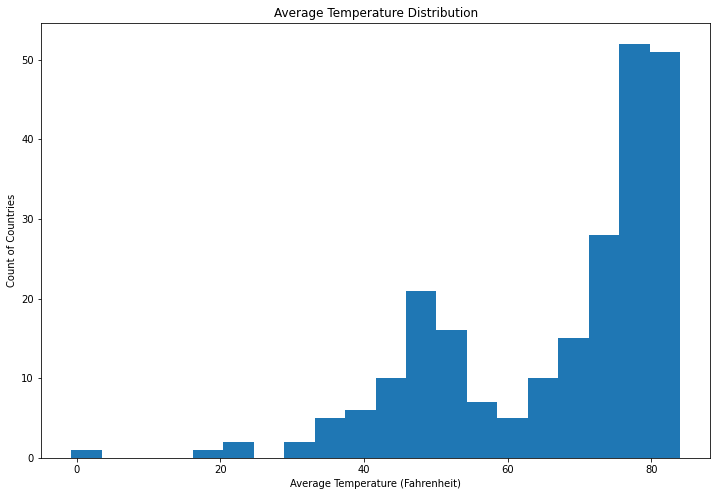

In [64]:
# Histogram of Average Temperature
plt.figure(figsize=(12, 8))
plt.hist(country_temps, bins=20)
plt.xlabel('Average Temperature (Fahrenheit)')
plt.ylabel('Count of Countries')
plt.title('Average Temperature Distribution')
plt.show()

We have a small bimodal curve. We will capture the 2 humps in moderate and high climate by curring in the dips. The majority of observations fall on the right, above 60 degrees, and the data is left skewed. The median average temperature is 73.8 degrees.

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_25954/326786163.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


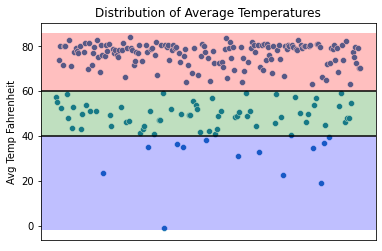

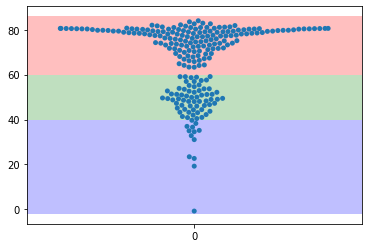

In [65]:
#Scatterplot with potential climate category lines
sns.scatterplot(data=country_temps)
plt.axhline(y = 60, color = 'black', linestyle = '-')
plt.axhline(y = 40, color = 'black', linestyle = '-')
plt.title('Distribution of Average Temperatures')
plt.xticks([])
plt.xlabel('')
plt.axhspan(60, 86, color='red', alpha=0.25, lw=0)
plt.axhspan(40, 60, color='green', alpha=0.25, lw=0)
plt.axhspan(-2, 40, color='blue', alpha=0.25, lw=0)
plt.show()

sns.swarmplot(data=country_temps)
plt.axhspan(60, 86, color='red', alpha=0.25, lw=0)
plt.axhspan(40, 60, color='green', alpha=0.25, lw=0)
plt.axhspan(-2, 40, color='blue', alpha=0.25, lw=0)
plt.show()

Here we will look to create the three climate categories by our arbitray drawing of the cutoff lines at 40 and 60 degrees. Create a categorical bin of 3 climates (cold, moderate, hot) based on the distribution of average temperatures.

In [66]:
# Categorize Countries by Average Temperature
climate = pd.DataFrame(country_temps)
climate['Climate'] = pd.cut(country_temps, [-200, 40, 60, 300], labels=['Cold', 'Moderate', 'Hot'])

# View the United States to confirm
climate[climate.index == 'United States']

,Avg Temp Fahrenheit,Climate
Country,,
United States,48.105324,Moderate


#### Climate Clusters Using K-Means
Now we will utilize the k-means algorithm to identify 3 clusters. Using the k-means algorithm will ensure that we are creating categories which are minimizing the mean squared error distance of cluster observations, as opposed to our arbitrary drawing of the cutoffs.

In [67]:
#Convert the series to an array and reshape
temperatures_array=country_temps.array.reshape(-1, 1) 

#Create the KMeans model with 3 clusters
kmeans=KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(temperatures_array)

#Get the cluster labels for each data point
clusters=kmeans.labels_

#Review the output of the model by printing the country, its temperature, and the corresponding cluster
#for country, temperature, cluster in zip(country_temps.index, temperatures_array, clusters):
#    print(f"Country: {country}, Temperature: {temperature[0]}, Cluster: {cluster}")

#Create a new data frame with the country temps and add the associated cluster as a column
climate2=pd.DataFrame(country_temps)
climate2['climate']=clusters

#Map the cluster to a climate description
temperate = climate2.query('Country == "United States"')
hot = climate2.query('Country == "Australia"')
cold = climate2.query('Country == "Russia"')
t = temperate['climate'][0]
h = hot['climate'][0]
c = cold['climate'][0]
#print(t, h, c)
climate2['climate'].replace({c:'cold', h:'hot', t:'temperate'}, inplace=True)
climate2

,Avg Temp Fahrenheit,climate
Country,,
Afghanistan,57.606536,temperate
Albania,55.194766,temperate
Algeria,73.879181,hot
American Samoa,80.095117,hot
Andorra,52.631964,temperate
...,...,...
Virgin Islands,79.763483,hot
Western Sahara,72.650865,hot
Yemen,79.393386,hot


Looking at the climate clusters assigned to gain confidence in the assignment of countries make sense. 

Next, let's see what the center value of the clusters are.

In [68]:
#Investigate the centers of the clusters to see where they lie and how closely our arbitrary assignments worked
centers=kmeans.cluster_centers_.flatten()
print(np.sort(centers))

[28.76980913 49.59748965 76.50084486]


Our arbitrary categorization was very close to what was obtained in the k-means clustering algorithm. We'll plot the temperatures with their assigned cluster and overlay our arbitrary cut lines.

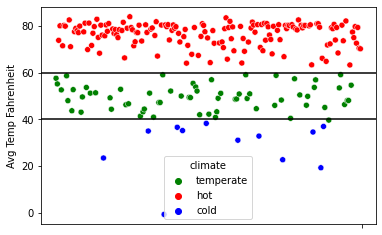

In [69]:
#Create a plot of the temperatures and the assigned cluster
sns.scatterplot(data=climate2, x=climate2.index, y='Avg Temp Fahrenheit', hue = 'climate', palette = ['g', 'r', 'b'])
plt.axhline(y = 60, color = 'black', linestyle = '-')
plt.axhline(y = 40, color = 'black', linestyle = '-')
plt.xticks('')
plt.xlabel('')
plt.show()

Our best guess categorization and the k-means clustering only differed by 1 assignment. K-means drew the cutoff point of cold and temperate at a slightly lower temperature than the 40 degrees we had originally.

In [70]:
print(climate2.groupby('climate').count())
print(climate.groupby('Climate').count())

           Avg Temp Fahrenheit
climate                       
cold                        12
hot                        156
temperate                   64
          Avg Temp Fahrenheit
Climate                      
Cold                       13
Moderate                   63
Hot                       156


In [71]:
climate2.describe()

,Avg Temp Fahrenheit
count,232.000000
mean,66.610383
std,15.813774
min,-0.734238
25%,52.712941
50%,73.776515
75%,79.376450
max,83.986774


There are now 232 observations in our climate data set. The mean average temperature is 66.6 degrees Fahrenheit and the median is 73.8 degrees.
The minimum average temperature is -0.7 degrees and the max is 84 degrees Fahrenheit.

Now, we will visualize the temperature and climate data on a map.  

Reading in a geo json of countries' polygons to enable the map to be drawn and merging the climate data into a single data frame.

In [72]:
countries_geo = gpd.read_file('countries.geojson')
countries_df=pd.merge(countries_geo, climate2, how='left', left_on='name', right_on='Country')
countries_df

,id,name,geometry,Avg Temp Fahrenheit,climate
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",57.606536,temperate
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",71.532228,hot
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",55.194766,temperate
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",82.177783,hot
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",58.666728,temperate
...,...,...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251...",NaN,NaN
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241...",79.393386,hot
177,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401...",63.365396,hot
178,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...",70.519724,hot


Plotting the average temperature of each country on the map. Missing countries will be indicated by cross hatching.

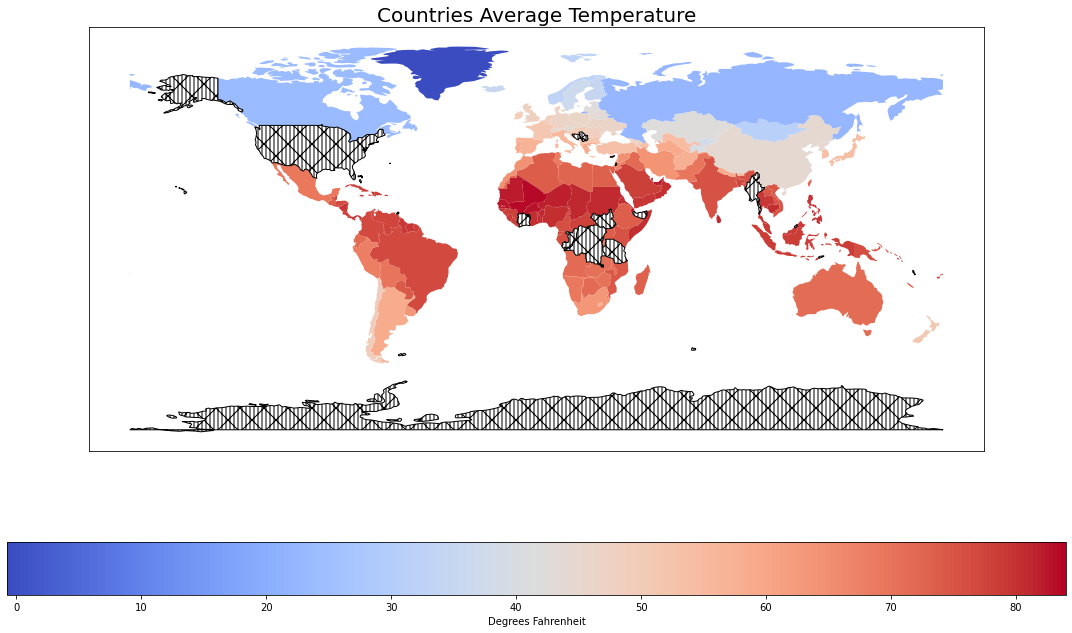

In [73]:
fig1, ax1=plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df.plot(column='Avg Temp Fahrenheit',
               cmap='coolwarm',
               linewidth=1,
               legend=True,
               missing_kwds={'color': 'white',
                          'edgecolor': 'black',
                          'hatch': '|\|/|',
                          'label': 'Missing'},
               legend_kwds={'label': 'Degrees Fahrenheit', 'orientation': 'horizontal'},
               ax=ax1)
ax1.set_title('Countries Average Temperature', fontsize=20)
ax1.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()

From this map, we can clearly see that some countries are missing. 

We also want to see how the climate assignments, based on average temperature, look on the map.

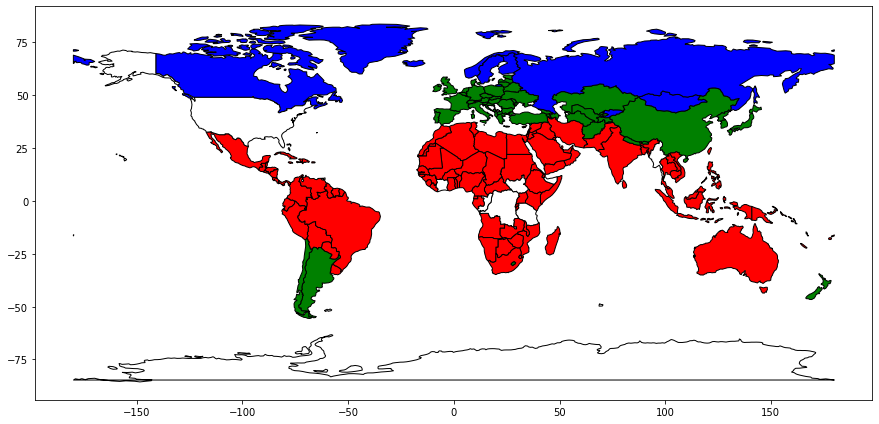

In [74]:
temp_palette = {'cold': 'blue', 'temperate': 'green', 'hot': 'red', np.NAN:'white' }

fig2, ax2 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df.plot(linewidth=1,
               legend=True,
               edgecolor='k',
               color=countries_df['climate'].map(temp_palette), 
               ax=ax2)
plt.show()

We can see we are missing a few countries, this would be due to differentiation of country names between the two merged data frames. We need to see a list of the countries which are missing data.

In [75]:
countries_df[countries_df['climate'].isnull()]
#climate2.reset_index
missing=pd.merge(countries_geo, climate2.reset_index(), how='outer', left_on='name', right_on='Country')
m2=pd.merge(climate2, countries_geo, how='outer', left_on='Country', right_on='name')
missing[(missing['climate'].isnull()) | (missing['name'].isnull())]
missing[missing['climate'].isnull()]

,id,name,geometry,Country,Avg Temp Fahrenheit,climate
6,ATA,Antarctica,"MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...",NaN,NaN,NaN
7,ATF,French Southern and Antarctic Lands,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN
17,BHS,The Bahamas,"MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ...",NaN,NaN,NaN
18,BIH,Bosnia and Herzegovina,"POLYGON ((19.00549 44.86023, 19.36803 44.86300...",NaN,NaN,NaN
21,BMU,Bermuda,"POLYGON ((-64.77997 32.30720, -64.78733 32.303...",NaN,NaN,NaN
24,BRN,Brunei,"POLYGON ((114.20402 4.52587, 114.59996 4.90001...",NaN,NaN,NaN
32,CIV,Ivory Coast,"POLYGON ((-2.85613 4.99448, -3.31108 4.98430, ...",NaN,NaN,NaN
34,COD,Democratic Republic of the Congo,"POLYGON ((30.83386 3.50917, 30.77335 2.33988, ...",NaN,NaN,NaN
35,COG,Republic of the Congo,"POLYGON ((12.99552 -4.78110, 12.62076 -4.43802...",NaN,NaN,NaN
39,-99,Northern Cyprus,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN


In [76]:
climate2[climate2.index.str.contains('Island')]

,Avg Temp Fahrenheit,climate
Country,,
Baker Island,78.029807,hot
British Virgin Islands,79.763483,hot
Cayman Islands,80.479170,hot
Christmas Island,78.743066,hot
Falkland Islands (Islas Malvinas),43.228470,temperate
Faroe Islands,44.424351,temperate
Heard Island And Mcdonald Islands,36.611807,cold
Northern Mariana Islands,80.594302,hot
Solomon Islands,80.070076,hot


After some investigation of the countries missing from the geo data frame, we have some cleaning to do for how the countries are named. Since our initial temperature data did not have an element of the country code, we joined on the country names. We can see this join caused an issue with the naming convention of countries between the two data frames. To remedy this, we constructed a list of names in the climate data frame and what the corresponding name is in the geo data frame. Using these we replaced the values.

In [77]:
old=['United States','Bahamas','Congo','Congo (Democratic Republic Of The)','Côte D\'Ivoire','Tanzania','Burma','Serbia','Bosnia And Herzegovina','French Southern And Antarctic Lands','Trinidad And Tobago','Falkland Islands (Islas Malvinas)','Timor Leste']
new=['United States of America','The Bahamas','Republic of the Congo','Democratic Republic of the Congo','Ivory Coast','United Republic of Tanzania','Myanmar','Republic of Serbia','Bosnia and Herzegovina','French Southern and Antarctic Lands','Trinidad and Tobago','Falkland Islands','East Timor']
climate2=climate2.reset_index()
climate2['Country'].replace(old,new, inplace=True)
#climate2

Now that we have cleaned the country names, we'll rejoin the dataframes into a cleaned version for visualization.

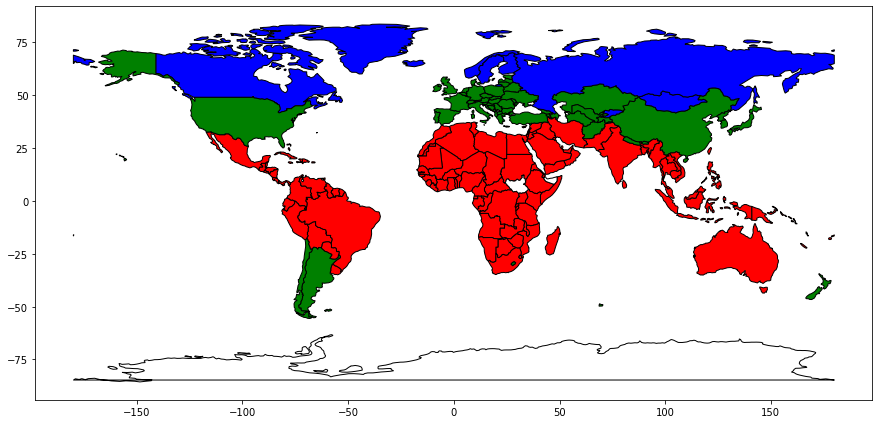

In [78]:
countries_df_cleaned=pd.merge(countries_geo, climate2, how='outer', left_on='name', right_on='Country')

fig3, ax3 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df_cleaned.plot(linewidth=1,
               legend=True,
               edgecolor='k',
               color=countries_df_cleaned['climate'].map(temp_palette),
               ax=ax3)
plt.show()

We are still missing a few countries.

In [79]:
countries_df_cleaned[countries_df_cleaned['climate'].isnull()]

,id,name,geometry,Country,Avg Temp Fahrenheit,climate
6,ATA,Antarctica,"MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...",NaN,NaN,NaN
21,BMU,Bermuda,"POLYGON ((-64.77997 32.30720, -64.78733 32.303...",NaN,NaN,NaN
24,BRN,Brunei,"POLYGON ((114.20402 4.52587, 114.59996 4.90001...",NaN,NaN,NaN
39,-99,Northern Cyprus,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN
90,CS-KM,Kosovo,"POLYGON ((20.76216 42.05186, 20.71731 41.84711...",NaN,NaN,NaN
142,SSD,South Sudan,"POLYGON ((33.96339 9.46429, 33.97498 8.68456, ...",NaN,NaN,NaN
147,-99,Somaliland,"POLYGON ((48.93813 9.45175, 48.48674 8.83763, ...",NaN,NaN,NaN
174,VUT,Vanuatu,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518...",NaN,NaN,NaN
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251...",NaN,NaN,NaN


After investigation into this missing countires, we found that Bermuda, Brunei, Kosovo, Vanuatu, and West Bank were not listed in the the temperature data. In the instance of Northern Cyprus, Cyprus was listed in the temperature data but not Northern Cyprus.  
Sudan is listed in both the temperature and geography data and is mapped as such. However, South Sudan is not provided in the temperature data. A reason for this may be that South Sudan gained independence in 2011 and our temperature data is provided through 2013. So, the map shown maybe more up to date than our temperature data is.  
Similarly, Somalia is listed both data sets, but there is no temperature data for Somaliland. A search on Google indicates that Somaliland is an autonomous region in northern Somalia. While Somaliland is self-governing, no foreign governments recognize it. This could likely explain the discrepancy on the map.

Looking at the join in the other direction, there are 61 countries with temperature reported, but do not have geometry data and are therefore not shown on the map. Some of these countries, like American Samoa or United States Virgin Islands, are territories. These may still have Olympic teams. Others, like Bahrain, are not included in the geography polygons and have participated in the Olympics. To ensure we capture as many countries as possible with their climate data and ultimately merging it to the Olympics data, we will outer join the climate and geography data in our final data frame.



### Average Temperature Map
Plotting the average temperature map. To be expected the highest average temperatures are between the tropic lines and nearest to the equator. The lowest average temperatures are in the Northern Hemisphere and include Canada, Russia, and Greenland. The moderate temperatures occur, mainly in the Northen Hemisphere, between the tropic lines and Arctic and Antarctic Circles.

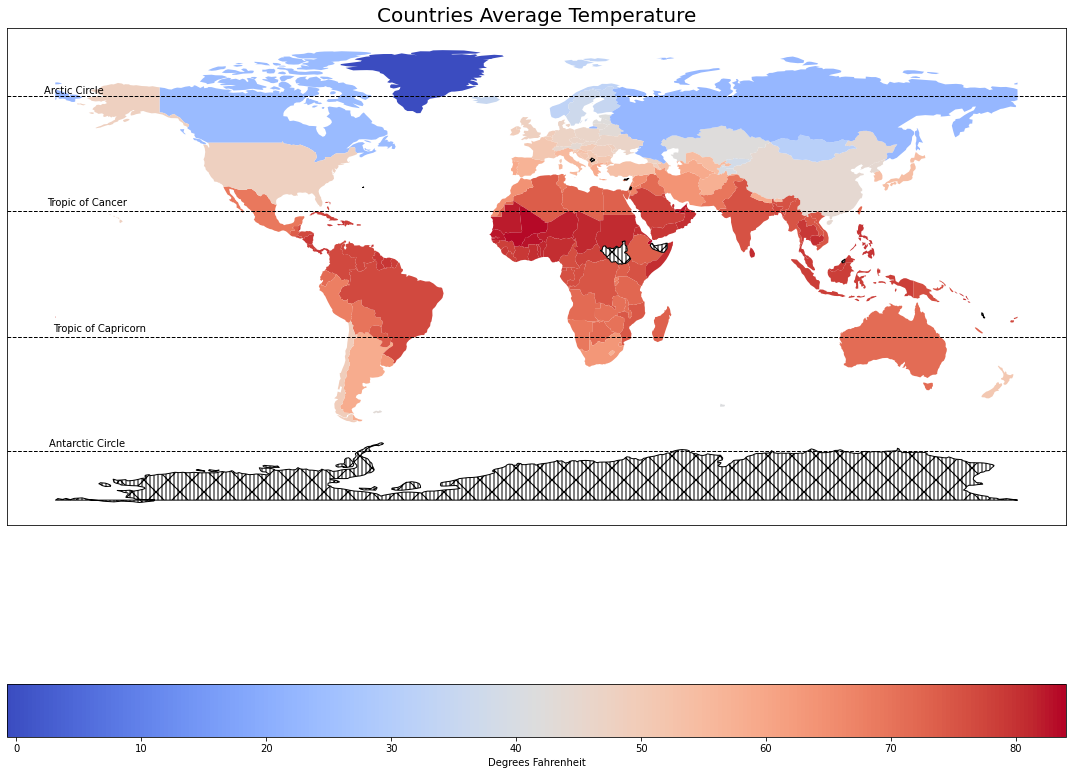

In [80]:
# Plot Average Temperature Map
fig4, ax4=plt.subplots(figsize=(15, 15), alpha=0.5, edgecolor='k')
countries_df_cleaned.plot(column='Avg Temp Fahrenheit',
               cmap='coolwarm',
               linewidth=1,
               legend=True,
               missing_kwds={'color': 'white',
                          'edgecolor': 'black',
                          'hatch': '|\|/|',
                          'label': 'Missing'},
               legend_kwds={'label': 'Degrees Fahrenheit', 'orientation': 'horizontal'},
               ax=ax4)

# Adding reference lines for the Tropic of Cancer and the Tropic of Capricorn
ax4.axhline(y=23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Cancer
ax4.axhline(y=-23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Capricorn
# Adding reference lines for the Arctic Circle and the Antarctic Circle
ax4.axhline(y=66.5, color='black', linestyle='--', linewidth=1)  # Arctic Circle
ax4.axhline(y=-66.5, color='black', linestyle='--', linewidth=1)  # Antarctic Circle

# Add Labels for Tropic Lines and Arctic Circle on the Left Side of the Map using x-coordinate
min_x=countries_df_cleaned.total_bounds[0]

#Adjust the Label Position
ax4.text(min_x + 27, 25.5, 'Tropic of Cancer', ha='right', color='black')
ax4.text(min_x + 34, -21.5, 'Tropic of Capricorn', ha='right', color='black')
ax4.text(min_x + 18, 67.5, 'Arctic Circle', ha='right', color='black')
ax4.text(min_x + 26, -64.5, 'Antarctic Circle', ha='right', color='black')

# Add Title and Adjust Ticks
ax4.set_title('Countries Average Temperature', fontsize=20)
ax4.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()

### Climate Map
Plotting the climate category map with Tropic of Cancer and Capricorn and Arctic and Antarctic Circles. Our climate categories from our model follow a similar pattern to the previous map. Hot climate countries are generally between the tropic lines. Temperate climate countries betwen the tropic and arctic circles and all the cold climate countries appear in the Northern Hemisphere and while they are not above the Arctic Circle, they are nearer to the North Pole. Only a few temperate climate countries fall in the southern Hemisphere, notably Chile, Argentina, and New Zealand.

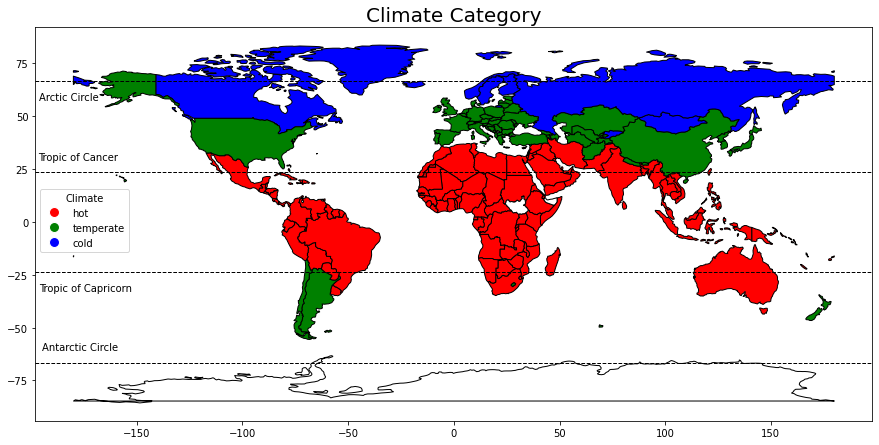

In [81]:
# Climate Categories
fig5, ax5 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_plot = countries_df_cleaned.plot(linewidth=1,
                                          legend=True,
                                          edgecolor='k',
                                          color=countries_df_cleaned['climate'].map(temp_palette),
                                          ax=ax5)

# Adding reference lines for the Tropic of Cancer and the Tropic of Capricorn
ax5.axhline(y=23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Cancer
ax5.axhline(y=-23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Capricorn
# Adding reference lines for the Arctic Circle and the Antarctic Circle
ax5.axhline(y=66.5, color='black', linestyle='--', linewidth=1)  # Arctic Circle
ax5.axhline(y=-66.5, color='black', linestyle='--', linewidth=1)  # Antarctic Circle

# Adding labels for the tropic lines and the arctic circle lines on the right side of the map
max_x = countries_df_cleaned.total_bounds[0]  # Get the maximum x-coordinate of the map
ax5.text(min_x + 21, 29.5, 'Tropic of Cancer', ha='right', color='black')
ax5.text(min_x + 28, -32.5, 'Tropic of Capricorn', ha='right', color='black')
ax5.text(min_x + 12, 57.5, 'Arctic Circle', ha='right', color='black')
ax5.text(min_x + 21, -60.5, 'Antarctic Circle', ha='right', color='black')

# Adding a custom legend
legend_dict = {k: plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in temp_palette.items() if not isinstance(k, float)}
handles = list(legend_dict.values())[::-1]  # Reverse the order of handles
labels = [h.get_label() for h in handles]
ax5.legend(handles=handles, labels=labels, loc='center left', title='Climate', bbox_to_anchor=(0,.51))
ax5.set_title('Climate Category', fontsize=20)
plt.show()

Now, let's join our temperature and map data on the country code. We are making some naming replacements, identified in our research, to align the country names of the two data sets.

In [82]:
old=['Serbia','Antigua and Barbuda','United Arab Republic','North Macedonia','The Gambia','Saint Kitts and Nevis','Saint Vincent and the Grenadines','Federated States of Micronesia','Palestine','Guinea-Bissau','São Tomé and Príncipe']
new=['Republic of Serbia','Antigua And Barbuda','Egypt','Macedonia','Gambia','Saint Kitts And Nevis','Saint Vincent And The Grenadines','Federated States Of Micronesia','Palestina','Guinea Bissau','Sao Tome And Principe']
olympics_noc['Country'].replace(old,new, inplace=True)

In [83]:
# Merge on NOC/id
olympic_id_temp = pd.merge(olympics_noc, countries_df_cleaned, how='left', left_on='Code', right_on='id')
olympic_id_temp.isnull().sum()

Name                              0
Sex                               0
Age                               0
Team                              0
NOC                               0
Games                             0
City                              0
Sport                             0
Event                             0
Medal                             0
Year                              0
Season                            0
Code                              0
National Olympic Committee        0
Country_x                         0
id                            76180
name                          76180
geometry                      76180
Country_y                     76309
Avg Temp Fahrenheit           76309
climate                       76309
dtype: int64

Merging on NOC does not yield good results.

In [84]:
# Merge on Country
olympic_country_temp = pd.merge(countries_df_cleaned, olympics_noc, how='right', on='Country')
olympic_country_temp.isnull().sum()

id                            3544
name                          3544
geometry                      3544
Country                          0
Avg Temp Fahrenheit            798
climate                        798
Name                             0
Sex                              0
Age                              0
Team                             0
NOC                              0
Games                            0
City                             0
Sport                            0
Event                            0
Medal                            0
Year                             0
Season                           0
Code                             0
National Olympic Committee       0
dtype: int64

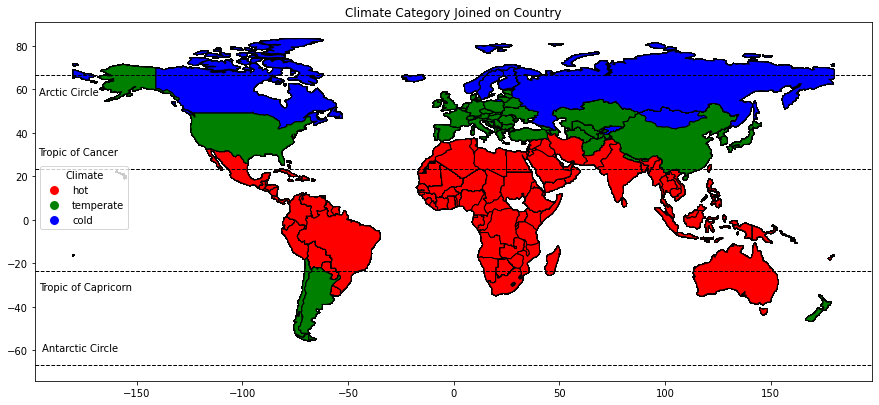

In [85]:
# Climate Categories Merged on Country
fig6, ax6 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_plot = olympic_country_temp.plot(linewidth=1,
                                          legend=True,
                                          edgecolor='k',
                                          color=olympic_country_temp['climate'].map(temp_palette),
                                          ax=ax6)

# Adding reference lines for the Tropic of Cancer and the Tropic of Capricorn
ax6.axhline(y=23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Cancer
ax6.axhline(y=-23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Capricorn
# Adding reference lines for the Arctic Circle and the Antarctic Circle
ax6.axhline(y=66.5, color='black', linestyle='--', linewidth=1)  # Arctic Circle
ax6.axhline(y=-66.5, color='black', linestyle='--', linewidth=1)  # Antarctic Circle

# Adding labels for the tropic lines and the arctic circle lines on the right side of the map
max_x = countries_df_cleaned.total_bounds[0]  # Get the maximum x-coordinate of the map
ax6.text(min_x + 21, 29.5, 'Tropic of Cancer', ha='right', color='black')
ax6.text(min_x + 28, -32.5, 'Tropic of Capricorn', ha='right', color='black')
ax6.text(min_x + 12, 57.5, 'Arctic Circle', ha='right', color='black')
ax6.text(min_x + 21, -60.5, 'Antarctic Circle', ha='right', color='black')

# Adding a custom legend
legend_dict = {k: plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in temp_palette.items() if not isinstance(k, float)}
handles = list(legend_dict.values())[::-1]  # Reverse the order of handles
labels = [h.get_label() for h in handles]
ax6.legend(handles=handles, labels=labels, loc='center left', title='Climate', bbox_to_anchor=(0,.51))
plt.title('Climate Category Joined on Country')
plt.show()

In [86]:
# Merge on Country and Name
olympic_name_temp = pd.merge(olympics_noc, countries_df_cleaned, how='left', left_on='Country', right_on='name')
olympic_name_temp.isnull().sum()

Name                             0
Sex                              0
Age                              0
Team                             0
NOC                              0
Games                            0
City                             0
Sport                            0
Event                            0
Medal                            0
Year                             0
Season                           0
Code                             0
National Olympic Committee       0
Country_x                        0
id                            3276
name                          3276
geometry                      3276
Country_y                     3544
Avg Temp Fahrenheit           3544
climate                       3544
dtype: int64

There are fewer nulls in the merged dataframe when we used Country from both dataframes. So we will do our final join on the Country column from both data frames.

In [87]:
# Country Where name is Null in Merged Dataframe with Country and Country
olympic_country_temp_null = olympic_country_temp[olympic_country_temp['climate'].isnull()]

olympic_country_temp_null['Country'].value_counts()

Country
Bermuda                 212
Bohemia                 153
Australasia              86
Netherlands Antilles     79
Eswatini                 67
Maldives                 49
Cook Islands             40
Vanuatu                  35
British West Indies      20
Marshall Islands         14
Nauru                    13
Brunei                   10
Kosovo                    8
Tuvalu                    7
South Sudan               3
North Borneo              2
Name: count, dtype: int64

In the end, we have fewer than 800 of the 270k athelete records that we could not join to the climate data. This list of 16 countries from the Olympic athletes data have had very few participants. After research, these countries were not provided in the temperature data.

From 1912 to 1948, the Olympics hosted an Art Competition. This Art Competition is listed in the Sport column and contained events like sculpture, painting, and architecture. The Art Competition peaked in 1932, with over 1100 athletes. For the purposes of our analysis we are primarily concerned with the impact of climate on sports. With this we will drop the records for the Art Competition.

In [88]:
olympic_country_temp=olympic_country_temp[olympic_country_temp['Sport']!='Art Competitions']

## Country Participation

First we will look at how the number of countries participating in the Olympic Games has changed of the course of the modern games. Using the percentage of countries participating will help to normalize the comparison, since the number of hot countries is more than double the number of temperate countries and more than 10 times that of cold countries.

In [89]:
#Count the number of unique coutnries in each climate participating in each games
country_participation=pd.DataFrame(olympic_country_temp.groupby(['Year','Season','climate'])['Country'].nunique())
country_participation.reset_index(inplace=True)
country_participation

,Year,Season,climate,Country
0,1896,Summer,cold,1
1,1896,Summer,hot,1
2,1896,Summer,temperate,10
3,1900,Summer,cold,4
4,1900,Summer,hot,9
...,...,...,...,...
147,2014,Winter,hot,25
148,2014,Winter,temperate,52
149,2016,Summer,cold,8
150,2016,Summer,hot,127


In [90]:
#Calculate the percentage of total countries of each climate participating
def country_percentage(row):
    if row['climate']=='hot':
        return (row['Country'] / 156) * 100
    elif row['climate'] == 'cold':
        return (row['Country'] / 12) * 100
    else:
        return (row['Country'] / 64) * 100

country_participation['Percentage'] = country_participation.apply(country_percentage, axis=1)
country_participation

,Year,Season,climate,Country,Percentage
0,1896,Summer,cold,1,8.333333
1,1896,Summer,hot,1,0.641026
2,1896,Summer,temperate,10,15.625000
3,1900,Summer,cold,4,33.333333
4,1900,Summer,hot,9,5.769231
...,...,...,...,...,...
147,2014,Winter,hot,25,16.025641
148,2014,Winter,temperate,52,81.250000
149,2016,Summer,cold,8,66.666667
150,2016,Summer,hot,127,81.410256


Plot of the country participation percent by climate over time.

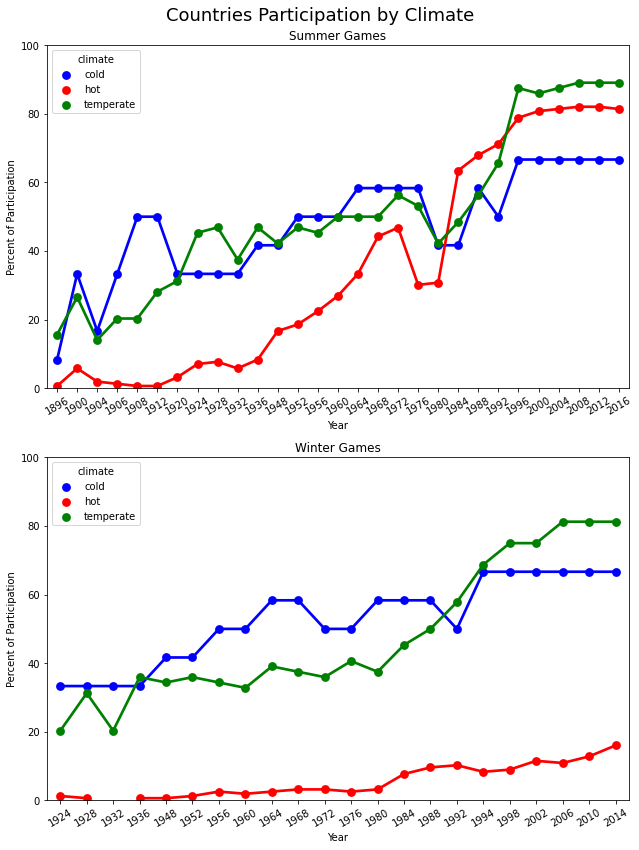

In [91]:
fig7, axs = plt.subplots(2,1, figsize=(9,12))
sns.pointplot(data=country_participation[country_participation['Season']=='Summer'], x='Year', y='Percentage', hue='climate', palette=temp_palette, ax=axs[0])
plt.suptitle('Countries Participation by Climate', y=1.02, fontsize=18)
axs[0].set_title('Summer Games')
axs[0].tick_params(axis='x',rotation=30)
axs[0].set_ylabel('Percent of Participation')
axs[0].set_ylim(0,100)

sns.pointplot(data=country_participation[country_participation['Season']=='Winter'], x='Year', y='Percentage', hue='climate', palette=temp_palette, ax=axs[1])
plt.suptitle('Countries Participation by Climate', fontsize=18)
axs[1].set_title('Winter Games')
axs[1].tick_params(axis='x',rotation=30)
axs[1].set_ylabel('Percent of Participation')
axs[1].set_ylim(0,100)

plt.tight_layout()
plt.show()

Separating the Summer and Winter Games, we can see how countries of each climate have started to participate more frequently in games opposite of their natural climate.  In the Summer Games, as far back as the early 1900's temperate and, surprisingly, cold countries participation was around 50%. The percentage of participation increased slightly for both to around 60% in the 1960's. Through the 1980's temperate countries saw a second period of growth and have leveled out to about 90% since the early 1990's. Interestingly, participation by hot climate countries started out quite low, 10% or less, until after WWII when the participation by hot countries began to grow steadily. Starting in 1948, participation by hot countries doubled, to 20%, and a period of steady increase in participation continued until 1996 when it reached 80%. Participation in Summer Olympics has remained steady for each climate since the 1996 games.  

In the Winter Olympics, which began in 1924, the participation by cold climate countries was highest until 1992. The participation percent of cold climate countries largely followed a similar pattern to that of cold countries in the Summer Games. Temperate climate countries, participated steadily around 40% until the 1980 games, where their participation steadily increased until 2000, reaching about 80%. Starting in 1994, temperate climate countires became the highest participating climate. Unsurprisingly, hot climate countries participate in the Winter Games at a drastically lower percentage than either cold or temperate countries, below 10% until 1980. Although not as dramatic an increase as temperate countries, hot countries began to increase participation in 1980 and have slowly increased to just under 20% in the most recent (2014) games.  

Currently, about 60% of cold climate countries participate in the Summer and Winter Games. About 90% of temperate countries participate in the Summer Games and about 80% in the Winter Games. However, while about 80% of hot climate countries participate in the Summer Games, less than 20% participate in the Winter Games. Factors other than climate could impact the difference in participation by hot climate countries in the Summer and Winter Games. Several Winter sports require more specialized equipment than Summer sports (Hockey or Bobsled vs Soccer or Track).

## Event Participation

Most of the Olympic sports are an umbrella under which there are multiple events. For example, Athletics (Track & Field) has over 80 events within it. Similarly, swimming, cycling, gymnastics, skiing, and shooting sports all have many events. So while a country might participate in a sport, that might not tell the whole story of how popular the sport is within that country.  
Here we will take a deeper dive into sports by looking at the event participation of each country over time. While athletes typically compete in a single sport, they could, and in these sports often do, participate in multiple events. We will address this by counting the number of unique events each country participated in.

In [92]:
olympic_country_temp.groupby('Sport')['Event'].nunique().nlargest(10)

Sport
Athletics     83
Shooting      83
Swimming      55
Cycling       44
Sailing       38
Wrestling     30
Archery       29
Canoeing      27
Gymnastics    27
Rowing        25
Name: Event, dtype: int64

In [93]:
#Create a data frame with the number of events participated in by each country at each Olympics
events=pd.DataFrame(olympic_country_temp.groupby(['Year','Season','climate','Country'])['Event'].nunique())
#Add a column which calculates the number of unique sports at each Olympic Games
events['Total Events']=olympic_country_temp.groupby(['Year','Season'])['Event'].nunique()
#Calculate the percentage of total sports each country participated in
events['Event Percent']=events['Event']/events['Total Events']
events

Event  Total Events  \
Year Season climate   Country                                         
1896 Summer cold      Sweden                        5            43   
            hot       Australia                     5            43   
            temperate Austria                       8            43   
                      Denmark                      12            43   
                      France                       18            43   
...                                               ...           ...   
2016 Summer temperate Turkmenistan                  9           306   
                      Ukraine                     142           306   
                      United Kingdom              198           306   
                      United States of America    246           306   
                      Uzbekistan                   69           306   

                                                Event Percent  
Year Season climate   Country                                  
1896 Summer cold      Sweden                         0.116279  
            hot       Australia                      0.116279  
            temperate Austria                        0.186047  
                      Denmark                        0.279070  
                      France                         0.418605  
...                                                       ...  
2016 Summer temperate Turkmenistan                   0.029412  
                      Ukraine                        0.464052  
                      United Kingdom                 0.647059  
                      United States of America       0.803922  
                      Uzbekistan                     0.225490  

[3667 rows x 3 columns]

### Selection of Year Snapshots

For our analysis, we wish to compare how participation has changed for coutries of each climate over time. To accomplish this we will select 3 separate games for each season to show the progression of participation history. Due to the occurence of boycotts at the 1976 and 1980 games and the cancelation of the games in 1916, 1940, and 1944 due to the World Wars, we chose the 3 years to analyze over time to be 1932, 1972, and 2012. For the Winter Games, we chose 2014, as there were no Winter Games held in 2012. This provides snapshots at 40 year intervals which span from the early years of the modern games to mid-1900's and present day.  



Create data frames for event participation in the Summer gaes for the 1932, 1972, and 2012 games. This provides 40 year intervals to track the change in participation in Summer events over time.

In [94]:
#Create separate data frames for year year and season to analyze.
events.reset_index(inplace=True)
summer1932=events[(events['Year']==1932) & (events['Season']=='Summer')]
summer1932=pd.merge(countries_df_cleaned, summer1932, how='left', on=['Country', 'climate'])
summer1932.dropna(subset=['Event Percent'], inplace=True)
#summer1932
summer1972=events[(events['Year']==1972) & (events['Season']=='Summer')]
summer1972=pd.merge(countries_df_cleaned, summer1972, how='left', on=['Country', 'climate'])
summer1972.dropna(subset=['Event Percent'], inplace=True)
#summer1972
summer2012=events[(events['Year']==2012) & (events['Season']=='Summer')]
summer2012=pd.merge(countries_df_cleaned, summer2012, how='left', on=['Country', 'climate'])
summer2012.dropna(subset=['Event Percent'], inplace=True)
#Sample of data frame
summer2012

,id,name,geometry,Country,Avg Temp Fahrenheit,climate,Year,Season,Event,Total Events,Event Percent
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Afghanistan,57.606536,temperate,2012.0,Summer,6.0,302.0,0.019868
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",Angola,71.532228,hot,2012.0,Summer,10.0,302.0,0.033113
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",Albania,55.194766,temperate,2012.0,Summer,9.0,302.0,0.029801
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,82.177783,hot,2012.0,Summer,9.0,302.0,0.029801
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",Argentina,58.666728,temperate,2012.0,Summer,66.0,302.0,0.218543
...,...,...,...,...,...,...,...,...,...,...,...
231,NaN,NaN,None,San Marino,57.390559,temperate,2012.0,Summer,4.0,302.0,0.013245
232,NaN,NaN,None,Sao Tome And Principe,78.745439,hot,2012.0,Summer,2.0,302.0,0.006623
233,NaN,NaN,None,Seychelles,80.329096,hot,2012.0,Summer,6.0,302.0,0.019868
234,NaN,NaN,None,Singapore,80.154541,hot,2012.0,Summer,29.0,302.0,0.096026


Create winter events data frames for 1932, 1972, and 2014 games. This captures participation in intervals of approximately 40 years and shows the change of participation of time. Note, there were no Winter Games in 2012, due to the change to alternating games every 2 years beginning in 1994. For this reason, we chose to use the 2014 Winter Games.

In [95]:
#Create separate data frames for each year of winter games to analyze.
winter1932=events[(events['Year']==1932) & (events['Season']=='Winter')]
winter1932=pd.merge(countries_df_cleaned, winter1932, how='left', on=['Country', 'climate'])
winter1932.dropna(subset=['Event Percent'], inplace=True)
#winter1932
winter1972=events[(events['Year']==1972) & (events['Season']=='Winter')]
winter1972=pd.merge(countries_df_cleaned, winter1972, how='left', on=['Country', 'climate'])
winter1972.dropna(subset=['Event Percent'], inplace=True)
#winter1972
winter2014=events[(events['Year']==2014) & (events['Season']=='Winter')]
winter2014=pd.merge(countries_df_cleaned, winter2014, how='left', on=['Country', 'climate'])
winter2014.dropna(subset=['Event Percent'], inplace=True)
#Sample of winter data
winter2014

,id,name,geometry,Country,Avg Temp Fahrenheit,climate,Year,Season,Event,Total Events,Event Percent
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",Albania,55.194766,temperate,2014.0,Winter,2.0,98.0,0.020408
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",Argentina,58.666728,temperate,2014.0,Winter,10.0,98.0,0.102041
5,ARM,Armenia,"POLYGON ((43.58275 41.09214, 44.97248 41.24813...",Armenia,48.018195,temperate,2014.0,Winter,5.0,98.0,0.051020
8,AUS,Australia,"MULTIPOLYGON (((145.39798 -40.79255, 146.36412...",Australia,71.132241,hot,2014.0,Winter,47.0,98.0,0.479592
9,AUT,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,43.692837,temperate,2014.0,Winter,70.0,98.0,0.714286
...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,None,Dominica,79.360612,hot,2014.0,Winter,1.0,98.0,0.010204
210,NaN,NaN,None,Liechtenstein,40.884800,temperate,2014.0,Winter,5.0,98.0,0.051020
215,NaN,NaN,None,Monaco,48.748510,temperate,2014.0,Winter,8.0,98.0,0.081633
231,NaN,NaN,None,San Marino,57.390559,temperate,2014.0,Winter,2.0,98.0,0.020408


In [96]:
#Create a list of the data frames and titles to iterate through in map generation
maplist=[summer1932, winter1932, summer1972, winter1972, summer2012, winter2014]
titles=['1932 Summer','1932 Winter', '1972 Summer', '1972 Winter', '2012 Summer', '2014 Winter']

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_25954/4024048343.py:23: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=axs[(i//2,i%2)],


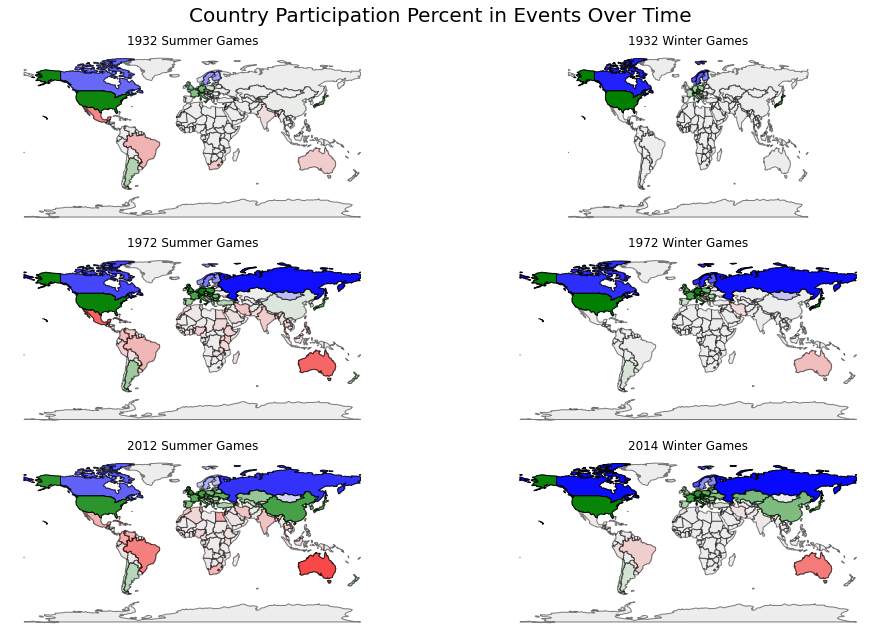

In [97]:
#Event Participation Map
#Map categories to colors
category_color_map = {'hot': 'red', 'cold': 'blue', 'temperate':'green'}

#Normalize continuous variable for color intensity between 0 and 100%
norm = Normalize(vmin=0, vmax=1)

# Create a ScalarMappable for color mapping of the continuous variable
sm = ScalarMappable(cmap='binary', norm=norm)
sm.set_array([])


fig8, axs = plt.subplots(3,2,figsize=(15, 9))

for i in range(len(maplist)):
    #Draw the country outlines and fill with a light grey
    countries_geo.plot(alpha=0.5, edgecolor='k', color='#dddddd', ax=axs[(i//2,i%2)])

    # Categorical variable: color based on categories with intensity based on continuous variable
    for category, color in category_color_map.items():
        subset = maplist[i][maplist[i]['climate'] == category]
        color_intensity = norm(subset['Event Percent'])
        subset.plot(ax=axs[(i//2,i%2)],
                    color=color, 
                    alpha=color_intensity,  
                    label=category, 
                    edgecolor='k'        
                    )
    axs[(i//2,i%2)].axis('off')
    axs[(i//2,i%2)].set_title(f'{titles[i]} Games')

fig8.suptitle(f'Country Participation Percent in Events Over Time', fontsize=20)
plt.tight_layout()
plt.show()

In the maps above, the intenstiy of the color is determined by the percent of participation for 0 to 100%. Low participation is lighter color and dark color is high participation

#### Event Participation Result 

Viewing the change in event participation over time, it is difficult to observe much variation. Hot climate countries in Africa appear almost white, even though there is participation. Overall in Winter, there is little variation over time. In light of this, we will explore the participation in sports instead.

## Sport Participation

Next, we will look at the participation in sports of both the Summer and Winter Games by countries in each climate. Each event rolls up to a sport category. There are fewer umbrella sports and specific sports have been added and removed over the course of Olympic history. Number of sports went from 9 in 1896 to 34 in the 2016 Summer Games. Sports may give us a better indication of participation by countries.  

In [98]:
#Create a data frame with the number of sports participated in by each country at each Olympics
sports=pd.DataFrame(olympic_country_temp.groupby(['Year','Season','climate','Country'])['Sport'].nunique())
#Add a column which calculates the number of unique sports at each Olympic Games
sports['Total']=olympic_country_temp.groupby(['Year','Season'])['Sport'].nunique()
#Calculate the percentage of total sports each country participated in
sports['Sport Percent']=sports['Sport']/sports['Total']
sports

Sport  Total  Sport Percent
Year Season climate   Country                                              
1896 Summer cold      Sweden                        2      9       0.222222
            hot       Australia                     2      9       0.222222
            temperate Austria                       3      9       0.333333
                      Denmark                       5      9       0.555556
                      France                        6      9       0.666667
...                                               ...    ...            ...
2016 Summer temperate Turkmenistan                  5     34       0.147059
                      Ukraine                      24     34       0.705882
                      United Kingdom               26     34       0.764706
                      United States of America     33     34       0.970588
                      Uzbekistan                   15     34       0.441176

[3667 rows x 3 columns]

In [99]:
#Merge into each games data frame the events and event percentage columns
sports.reset_index(inplace=True)
summer1932=pd.merge(summer1932, sports[(sports['Year']==1932) & (sports['Season']=='Summer')], how='inner', left_on=['Year','Season','Country','climate'], right_on=['Year','Season','Country','climate'])
#summer1932
summer1972=pd.merge(summer1972, sports[(sports['Year']==1972) & (sports['Season']=='Summer')], how='inner', left_on=['Year','Season','Country','climate'], right_on=['Year','Season','Country','climate'])
#summer1972
summer2012=pd.merge(summer2012, sports[(sports['Year']==2012) & (sports['Season']=='Summer')], how='inner', left_on=['Year','Season','Country','climate'], right_on=['Year','Season','Country','climate'])
#summer2012
winter1932=pd.merge(winter1932, sports[(sports['Year']==1932) & (sports['Season']=='Winter')], how='inner', left_on=['Year','Season','Country','climate'], right_on=['Year','Season','Country','climate'])
#winter1932
winter1972=pd.merge(winter1972, sports[(sports['Year']==1972) & (sports['Season']=='Winter')], how='inner', left_on=['Year','Season','Country','climate'], right_on=['Year','Season','Country','climate'])
#winter1972
winter2014=pd.merge(winter2014, sports[(sports['Year']==2014) & (sports['Season']=='Winter')], how='inner', left_on=['Year','Season','Country','climate'], right_on=['Year','Season','Country','climate'])
#Sample of final data frame
winter2014

,id,name,geometry,Country,Avg Temp Fahrenheit,climate,Year,Season,Event,Total Events,Event Percent,Sport,Total,Sport Percent
0,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",Albania,55.194766,temperate,2014.0,Winter,2.0,98.0,0.020408,1,15,0.066667
1,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",Argentina,58.666728,temperate,2014.0,Winter,10.0,98.0,0.102041,2,15,0.133333
2,ARM,Armenia,"POLYGON ((43.58275 41.09214, 44.97248 41.24813...",Armenia,48.018195,temperate,2014.0,Winter,5.0,98.0,0.051020,2,15,0.133333
3,AUS,Australia,"MULTIPOLYGON (((145.39798 -40.79255, 146.36412...",Australia,71.132241,hot,2014.0,Winter,47.0,98.0,0.479592,11,15,0.733333
4,AUT,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,43.692837,temperate,2014.0,Winter,70.0,98.0,0.714286,14,15,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,None,Dominica,79.360612,hot,2014.0,Winter,1.0,98.0,0.010204,1,15,0.066667
81,NaN,NaN,None,Liechtenstein,40.884800,temperate,2014.0,Winter,5.0,98.0,0.051020,2,15,0.133333
82,NaN,NaN,None,Monaco,48.748510,temperate,2014.0,Winter,8.0,98.0,0.081633,2,15,0.133333
83,NaN,NaN,None,San Marino,57.390559,temperate,2014.0,Winter,2.0,98.0,0.020408,1,15,0.066667


In [100]:
events

,Year,Season,climate,Country,Event,Total Events,Event Percent
0,1896,Summer,cold,Sweden,5,43,0.116279
1,1896,Summer,hot,Australia,5,43,0.116279
2,1896,Summer,temperate,Austria,8,43,0.186047
3,1896,Summer,temperate,Denmark,12,43,0.279070
4,1896,Summer,temperate,France,18,43,0.418605
...,...,...,...,...,...,...,...
3662,2016,Summer,temperate,Turkmenistan,9,306,0.029412
3663,2016,Summer,temperate,Ukraine,142,306,0.464052
3664,2016,Summer,temperate,United Kingdom,198,306,0.647059
3665,2016,Summer,temperate,United States of America,246,306,0.803922


In [101]:
sports

,Year,Season,climate,Country,Sport,Total,Sport Percent
0,1896,Summer,cold,Sweden,2,9,0.222222
1,1896,Summer,hot,Australia,2,9,0.222222
2,1896,Summer,temperate,Austria,3,9,0.333333
3,1896,Summer,temperate,Denmark,5,9,0.555556
4,1896,Summer,temperate,France,6,9,0.666667
...,...,...,...,...,...,...,...
3662,2016,Summer,temperate,Turkmenistan,5,34,0.147059
3663,2016,Summer,temperate,Ukraine,24,34,0.705882
3664,2016,Summer,temperate,United Kingdom,26,34,0.764706
3665,2016,Summer,temperate,United States of America,33,34,0.970588


High level comparison of sport and event participation shows typically lower participation. In terms of events, in 1896 Summer Games, Sweden participated in 2 of 9 sports (22%) and participated only in 5 of 43 events (12%). Similarly, in the 2016 Summer Games USA partipcated in all but 1 of the 34 sports (97%), but when we look at the events USA participated in 246 of 306 events, for 80%.

In [102]:
#Update our list of data frames
maplist=[summer1932, winter1932, summer1972, winter1972, summer2012, winter2014]

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_25954/1270263484.py:12: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=axs[(i//2,i%2)],


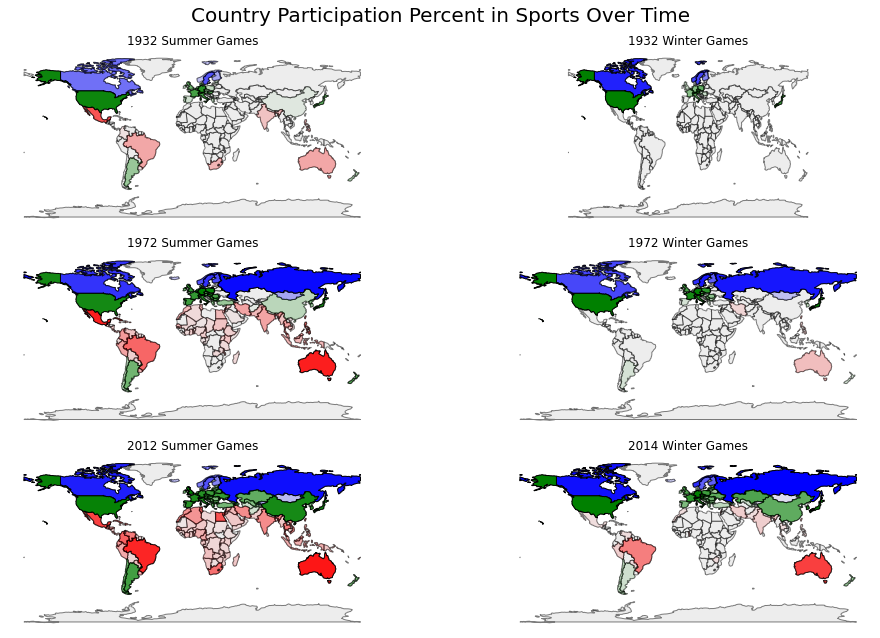

In [103]:
#Sport Participation Map
fig9, axs = plt.subplots(3,2,figsize=(15, 9))

for i in range(len(maplist)):
    #Draw the country outlines and fill with a light grey
    countries_geo.plot(alpha=0.5, edgecolor='k', color='#dddddd', ax=axs[(i//2,i%2)])

    # Categorical variable: color based on categories with intensity based on continuous variable
    for category, color in category_color_map.items():
        subset = maplist[i][maplist[i]['climate'] == category]
        color_intensity = norm(subset['Sport Percent'])
        subset.plot(ax=axs[(i//2,i%2)],
                    color=color, 
                    alpha=color_intensity, 
                    label=category, 
                    edgecolor='k'    
                    )
    axs[(i//2,i%2)].axis('off')
    axs[(i//2,i%2)].set_title(f'{titles[i]} Games')

fig9.suptitle(f'Country Participation Percent in Sports Over Time', fontsize=20)
plt.tight_layout()
plt.show()

In the maps above, the intenstiy of the color is determined by the percent of participation for 0 to 100%. Low participation is lighter color and dark color is high participation

### Sports Participation Results

For the Summer Games, participation in sports was very low by hot climate countries early on and even into the 1970's. However, participation has increased markedly by 2012. Even in temperate climate countries, outside of USA and Europe there was little participation in the early years. Now, most temperate climate countries have a strong participation in sports. The cold climate countries participation is driven strongly by Canada and Russia, while there is mixed participation in the Nordic countries. Today, the Olympic Summer Games have truly become the global games.

For the Winter Games, there was virtually no participation by hot countries outside of Australia through the 1970's. Early on, participation in Winter Games was limitied to USA, Canada, and Europe, with strong showing by the Nordic countires. Until at least 1972, essentially all participation was by USA, Canada, Russia, and European countries. Australia was the only hot country of note but still had low participation. While participation has expanded as of 2014 in the Winter Games to include more countries from Asia, there is essentially no participation or very little by African countries, island nations of Indopacific and most of South America.

## Medal Success

Lastly, we want to explore the medal success of countries at the Summer and Winter Olympic Games and analyze if there exists relationship between a country's climate and its success at which season of games.  
Our data on athletes contains every athlete in competition. If a event is a team event, then each individual team member is listed and if that team won a medal, then each team member would be listed as having received a medal. This may be misleading if say a country only participated in the event of Women's Soccer and won a medal. Then the country could have 17 medal winners by only participating in the single event. To address this, we removed the individual athlete names and deduplicated the data frame to give us the number of teams which earned a medal.

In [104]:
olympic_country_temp[(olympic_country_temp['Event'].str.contains("Women's Football")) & (olympic_country_temp['NOC']=='USA') & (olympic_country_temp['Year']==2008)][['Team','Name','Games','Event','Medal']]

,Team,Name,Games,Event,Medal
27532,United States,Shannon Leigh Boxx,2008 Summer,Football Women's Football,Gold
31435,United States,Rachel Marie Buehler (-Van Hollebeke),2008 Summer,Football Women's Football,Gold
38139,United States,Lori Christine Chalupny,2008 Summer,Football Women's Football,Gold
39538,United States,Lauren Nicole Cheney (-Holiday),2008 Summer,Football Women's Football,Gold
45711,United States,Stephanie Renee Cox (Lopez-),2008 Summer,Football Women's Football,Gold
92734,United States,Tobin Powell Heath,2008 Summer,Football Women's Football,Gold
100343,United States,Angela Khalia Hucles,2008 Summer,Football Women's Football,Gold
111895,United States,"Natasha Kanani Janine ""Tasha"" Kai",2008 Summer,Football Women's Football,Gold
141104,United States,Carli Anne Lloyd (-Hollins),2008 Summer,Football Women's Football,Gold
160413,United States,Heather Blaine Mitts (-Feeley),2008 Summer,Football Women's Football,Gold


In [105]:
#Drop duplicates
team_medals=olympic_country_temp.copy()
team_medals.drop(columns=['id', 'Name', 'Sex', 'Age', 'City'], inplace=True)
team_medals.drop_duplicates(inplace=True)

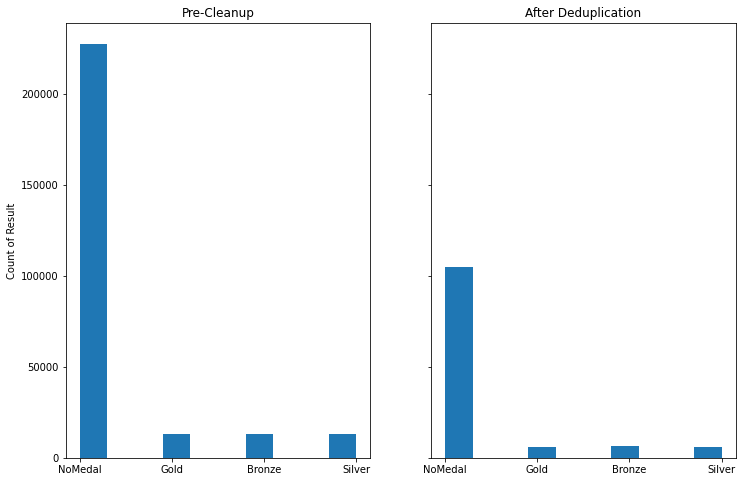

In [106]:
#Comparison of medals after removing duplicates
fig10, axs=plt.subplots(1,2, figsize=(12,8), sharey=True)
axs[0].hist(data=olympic_country_temp, x='Medal')
axs[1].hist(data=team_medals, x='Medal')
axs[0].set_ylabel('Count of Result')
axs[0].set_title('Pre-Cleanup')
axs[1].set_title('After Deduplication')
plt.show()

In [107]:
print(olympic_country_temp.groupby('Medal')['Medal'].count())
team_medals.groupby('Medal')['Medal'].count()

Medal
Bronze      13241
Gold        13322
NoMedal    227810
Silver      13059
Name: Medal, dtype: int64


Medal
Bronze       6507
Gold         6155
NoMedal    105131
Silver       6113
Name: Medal, dtype: int64

By grouping medal counts by event and team, we have eliminated duplicates of over half of the number of each medal type and over 60% of non-medal lines. This will provide us with a better idea of how many event a country earned a medal in.

In [108]:
team_medals=team_medals[team_medals['Medal']!='NoMedal']
medals_summer=team_medals[team_medals['Season']=='Summer']
medals_summer=pd.DataFrame(medals_summer.groupby(['Year','Season','climate'])['Medal'].count())
medals_summer.reset_index(inplace=True)
medals_winter=team_medals[team_medals['Season']=='Winter']
medals_winter=pd.DataFrame(medals_winter.groupby(['Year','Season','climate'])['Medal'].count())
medals_winter.reset_index(inplace=True)
medals_summer

,Year,Season,climate,Medal
0,1896,Summer,hot,3
1,1896,Summer,temperate,117
2,1900,Summer,cold,9
3,1900,Summer,hot,13
4,1900,Summer,temperate,275
...,...,...,...,...
81,2012,Summer,hot,174
82,2012,Summer,temperate,668
83,2016,Summer,cold,96
84,2016,Summer,hot,176


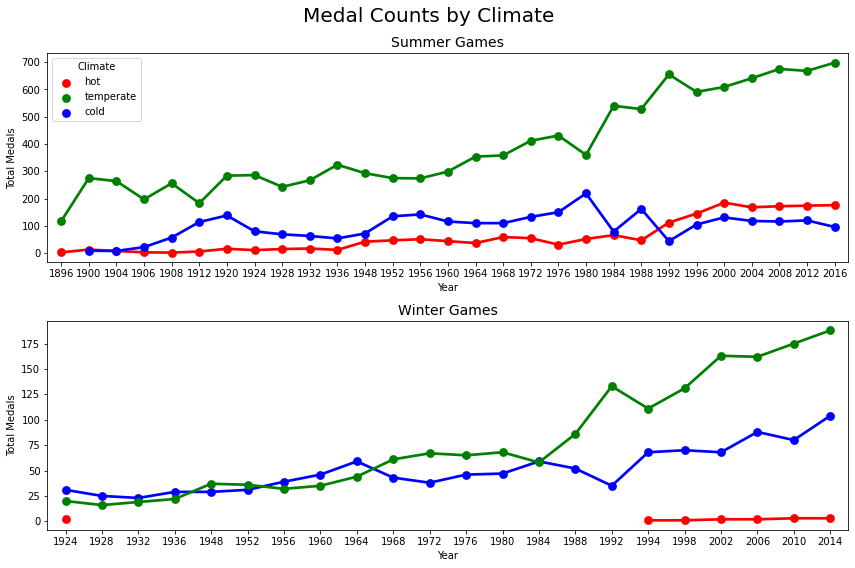

In [109]:
#Total Medal Counts
fig11, axs= plt.subplots(2,1, figsize=(12,8))
sns.pointplot(data=medals_summer, x='Year', y='Medal', hue='climate', palette=temp_palette, ax=axs[0])
sns.pointplot(data=medals_winter, x='Year', y='Medal', hue='climate', palette=temp_palette, ax=axs[1])
axs[0].legend().set_title('Climate')
axs[0].set_ylabel('Total Medals')
axs[1].set_ylabel('Total Medals')
axs[1].legend().set_visible(False)
fig11.suptitle('Medal Counts by Climate', fontsize=20)
axs[0].set_title('Summer Games', fontsize=14)
axs[1].set_title('Winter Games', fontsize=14)
plt.tight_layout()
plt.show()

#### Countries Total Medal Counts

Total medal counts at both the Summer and Winter Games has been dominated by temperate countries. Part of the explanation for this could have to due with other factors outside our analysis, such as population and GDP. However, there are some interesting observations here. At the Summer Games, cold climate countries have faired fairly well in their success. While hot countries have only recently surpassed the cold climate countries for total medal counts, starting in 1992. 

At the Winter Games, cold and temperate climate countries were in close competition until the 1980's when temperate climate countries began to out perform cold climate countries. As we might have expected, hot climate countries have tended to not have much success at the Winter Games. In fact they had no medal from the 1928 games until 1994.

#### Climate Medal Share

Next, to normalize the data we will look at the share of medals won by each climate at each games. This will show the percentage of total medals won by countries of each climate and remove the issue of the increasing number of sports and events contested at the Games over the history.

In [110]:
#Calculate the ntotal number of medals awarded at each Summer Games
total_medals_summer=medals_summer.groupby(['Year'])['Medal'].sum()
#Create a new column in the summer medals data frame containing the total
medals_summer=pd.merge(medals_summer, total_medals_summer, how='inner', left_on='Year', right_on='Year')
#Create a new column which contains the percent of total medals
medals_summer['Medal Percent']=(medals_summer['Medal_x']/medals_summer['Medal_y'])*100
#Rename columns and clean up
medals_summer.rename(columns={'Medal_x':'Medal'}, inplace=True)
medals_summer.drop(columns=['Medal_y'], inplace=True)

In [111]:
#Same steps for the Winter Games
total_medals_winter=medals_winter.groupby(['Year'])['Medal'].sum()
#Create a new column in the winter medals data frame containing the total
medals_winter=pd.merge(medals_winter, total_medals_winter, how='inner', left_on='Year', right_on='Year')
#Create a new column which contains the percent of total medals
medals_winter['Medal Percent']=(medals_winter['Medal_x']/medals_winter['Medal_y'])*100
#Rename columns and clean up
medals_winter.rename(columns={'Medal_x':'Medal'}, inplace=True)
medals_winter.drop(columns=['Medal_y'], inplace=True)

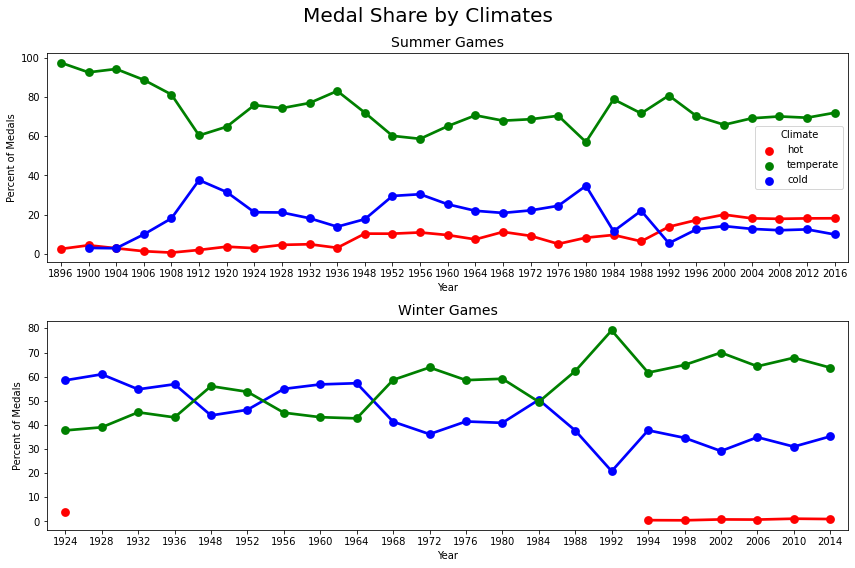

In [112]:
#Percent of total medals
fig12, axs= plt.subplots(2,1, figsize=(12,8))
sns.pointplot(data=medals_summer, x='Year', y='Medal Percent', hue='climate', palette=temp_palette, ci=None, ax=axs[0])
sns.pointplot(data=medals_winter, x='Year', y='Medal Percent', hue='climate', palette=temp_palette, ci=None, ax=axs[1])

axs[0].legend().set_title('Climate')
axs[1].legend().set_visible(False)
axs[0].set_ylabel('Percent of Medals')
axs[1].set_ylabel('Percent of Medals')
fig12.suptitle('Medal Share by Climates', fontsize=20)
axs[0].set_title('Summer Games', fontsize=14)
axs[1].set_title('Winter Games', fontsize=14)
plt.tight_layout()
plt.show()

At the Summer Games, temperate climate countries have consistently won the majority of medals, between 60% and 80% at each Games. Similarly to what we observed in the total counts, cold climate countries won the second highest percentage, of between 20% and 40% until 1984. At which point, they dropped to closer to 10%-15% and hot climate countries have won about 20% since then.

At the Winter Games, temperate and cold climate countries each won between 40%-60% of medals, trading the highest share of medals back and forth through 1984. Starting in 1988, temperate climate countries began to dominate more of the medal share, peaking to almost 80% in 1992, before plateauing to 70% since. After 1988, cold climate countries saw their share of medals decrease to about 30%. In 1994, hot climate countries began to win a marginal percentage of the medals each year.

While this approach addresses the increasing number of medals awarded and allows for easier comparison of which climates had the most success, it does not address the issue of the small number of cold climate countries or larger number of hot countries in our model. We'll try another approach next, looking at the average number of medals won by countries in each climate.

#### Average Number of Medals Won by Climate

The two visulaizations above do not address that there are significantly fewer cold climate countries, and while there are significantly more hot climate countries they have not faired well. To combat this issue of the number of countires in each climate, we will now look to normalize the medals by calculating the average number of medal won by countries of each climate. This will remove the issue of the large differences in the number of cold, temperate, and hot climate countries and display the average number of medal for our analysis.

In [113]:
#Calculate the number of countries in each climate each year
teams=team_medals.groupby(['Year','Season','climate'])['Country'].nunique()
#Create a new column in the summer medals dataa frame with the number of countries competing
medals_summer=pd.merge(medals_summer, teams, how='inner', left_on=['Year','Season','climate'], right_on=['Year','Season','climate'])
#Calculate the percentage of total sports each country participated in
medals_summer['Avg Medals']=medals_summer['Medal']/medals_summer['Country']
#Repeat for the winter
medals_winter=pd.merge(medals_winter, teams, how='inner', left_on=['Year','Season','climate'], right_on=['Year','Season','climate'])
medals_winter['Avg Medals']=medals_winter['Medal']/medals_winter['Country']

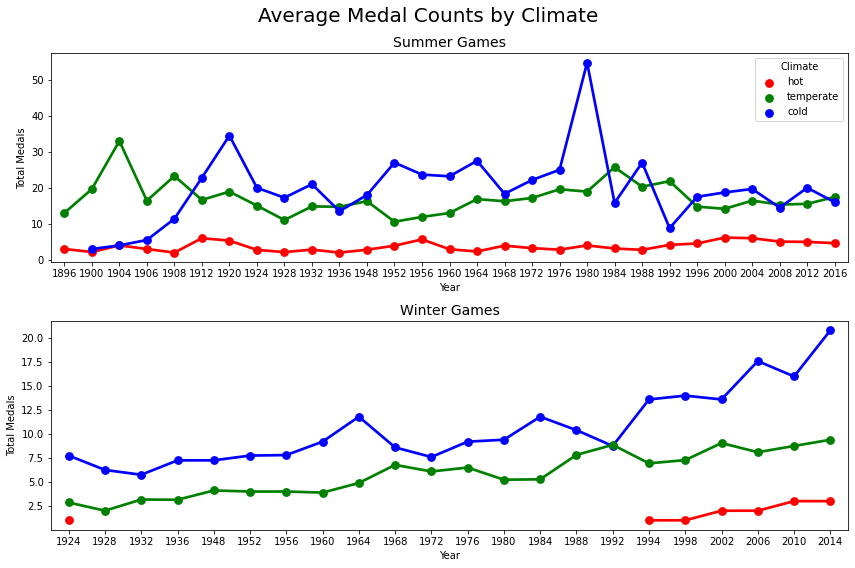

In [114]:
#Average medals won
fig13, axs= plt.subplots(2,1, figsize=(12,8))
sns.pointplot(data=medals_summer, x='Year', y='Avg Medals', hue='climate', palette=temp_palette, ax=axs[0])
sns.pointplot(data=medals_winter, x='Year', y='Avg Medals', hue='climate', palette=temp_palette, ax=axs[1])
axs[0].legend().set_title('Climate')
axs[0].set_ylabel('Total Medals')
axs[1].set_ylabel('Total Medals')
axs[1].legend().set_visible(False)
fig13.suptitle('Average Medal Counts by Climate', fontsize=20)
axs[0].set_title('Summer Games', fontsize=14)
axs[1].set_title('Winter Games', fontsize=14)
plt.tight_layout()
plt.show()

#### Countries Average Medal Count

This shows us the average number of medals won by countries of each climate, in both Summer and Winter Games, over time. With fewer countries, cold climate countires surprisingly perform very well at the Summer Games. In fact, on aveage cold climate countries outperformed temperate countries at all but 5 summer games since 1912! The only drastic domination by temperate countries was in 1992. With this normalization, we can see that hot climate countries still have less success even at the Summer Games and the fact that they have more total medals in recent years is due to the increase in participation of the 153 hot climate countries.

Less surprising, cold climate countries tend to dominate in the Winter Games, on average. While it was difficult to parse out the success of hot climate countries in recent years due to the overall low medal counts compared to other climates. We can see that on average they have been seeing a slow, but steady increase in success!

Again, this may not tell the entire story, as some of the most prolific countries may be pulling the weight of other countries and skewing the average medal success higher. Some of those countries we identified early on are USA, Russia, China, and Germany. We'll do a little more digging into the impact of those countries next.


Average medal counts by climate could be skewed by outlying countries with prolific medal counts. Let's look at the last 5 games and see the distribution of medal counts by countries in each climate.

In [115]:
country_medals=pd.DataFrame(team_medals.groupby(['Year', 'Season', 'Country','geometry','climate'])['Medal'].count())
country_medals.reset_index(inplace=True)

Let's look at just the most recent games, of this century.

In [116]:
recent_medals=country_medals[country_medals['Year']>=2000]

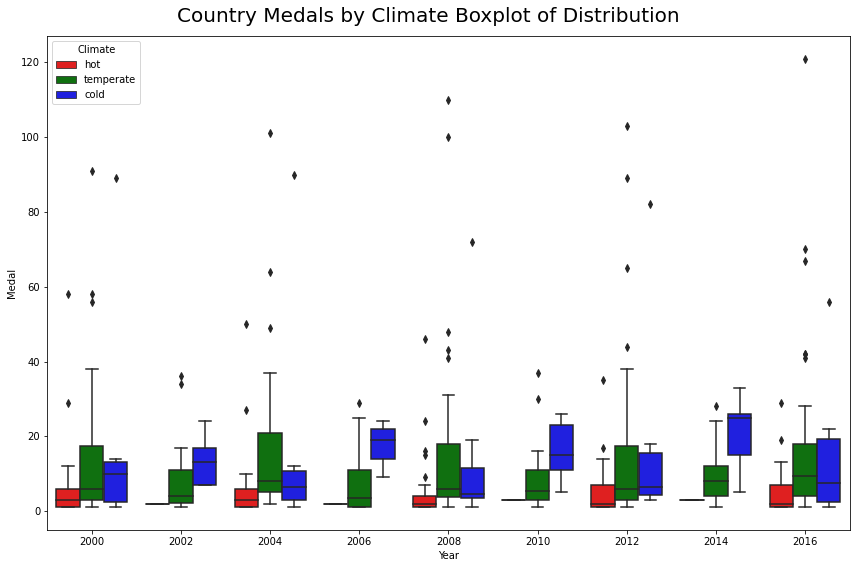

In [117]:
fig14=plt.figure(figsize=(12,8))
sns.boxplot(data=recent_medals, x='Year', y='Medal', hue='climate',palette=temp_palette)
fig14.suptitle('Country Medals by Climate Boxplot of Distribution', fontsize=20)
plt.legend().set_title('Climate')
plt.tight_layout()
plt.show()                       

Here we can see that in each year and most climates there are outliers with more medals than most others. But, which countries are they? Here is a sample of the temperate climate countries for 2008 Summer Games.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


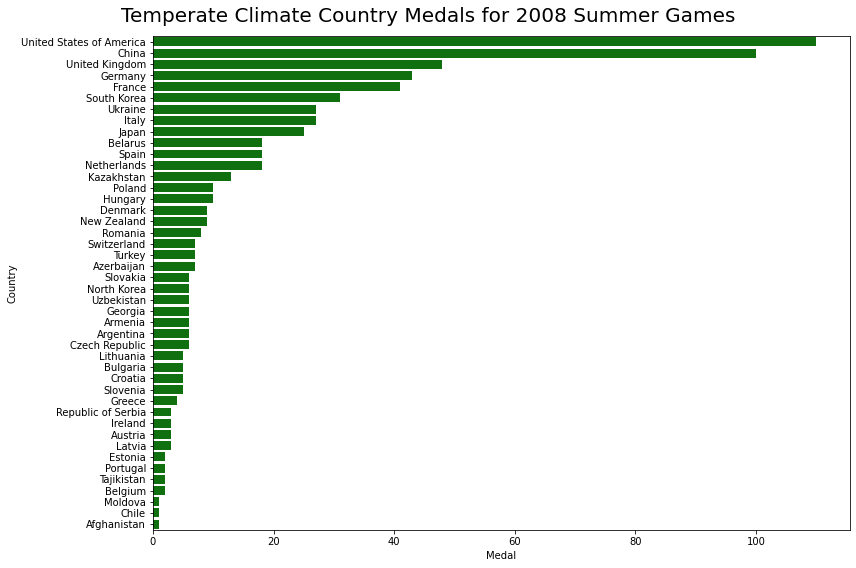

In [118]:
fig15=plt.figure(figsize=(12,8))
sns.barplot(data=recent_medals[(recent_medals['Year']==2008) & (recent_medals['climate']=='temperate')].sort_values(by='Medal', ascending=False), y='Country', x='Medal', color='green')
fig15.suptitle('Temperate Climate Country Medals for 2008 Summer Games', fontsize=20)
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()      

There is a little variation in each year, but the consistent countries are USA, UK, China, France, and Germany.

If we are interested in the variation of how the majority of countries perform, we can filter out the outliers in each year and climate. Using the standard of outlier to be countries above or below 1.5 times the interquartile range we will determine this range, grouped by year, season, and climate and then remove outliers from each of those groups.

In [119]:
#Create a function to calculate the interquartile range of a group passed as the paramter. Then calculate the threshold of outlier values for each group and remove any outlying countries. 
#return the filtered group
def remove_outliers(group):
    q1=group['Medal'].quantile(0.25)
    q3=group['Medal'].quantile(0.75)
    iqr=q3-q1
    threshold=1.5*iqr
    return group[(group['Medal']>=q1-threshold) & (group['Medal']<=q3+threshold)]

# Apply the function to each group of 'year' and 'season'
filtered_recent_medals = recent_medals.groupby(['Year', 'Season', 'climate']).apply(remove_outliers).reset_index(drop=True)


Now that we have removed the outliers let's review the same 2008 Summer Games for temperate countries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


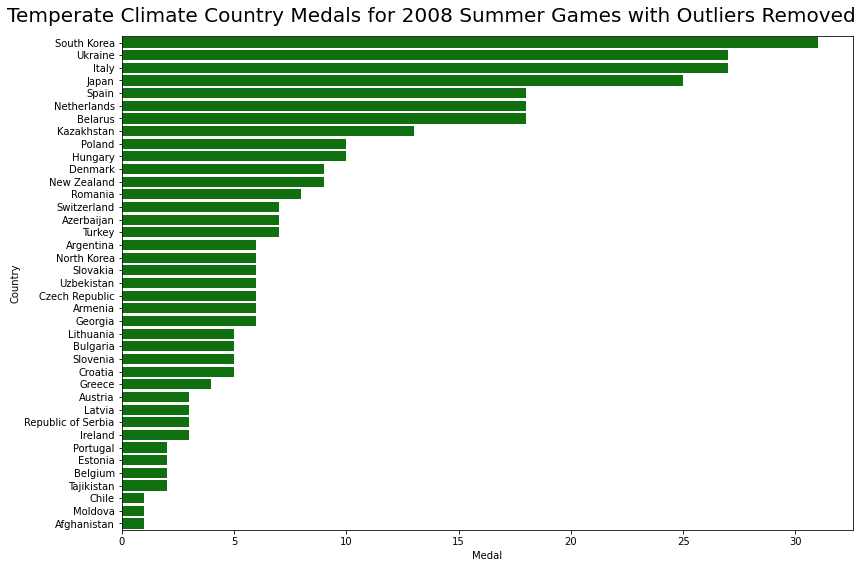

In [120]:
fig16=plt.figure(figsize=(12,8))
sns.barplot(data=filtered_recent_medals[(filtered_recent_medals['Year']==2008) & (filtered_recent_medals['climate']=='temperate')].sort_values(by='Medal', ascending=False), y='Country', x='Medal', color='green')
fig16.suptitle('Temperate Climate Country Medals for 2008 Summer Games with Outliers Removed', fontsize=20)
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()      


In [121]:
#Calculate the mean medals for each climate each year
filtered_avg_medals=pd.DataFrame(filtered_recent_medals.groupby(['Year', 'Season','climate'])['Medal'].mean())
filtered_avg_medals.reset_index(inplace=True)

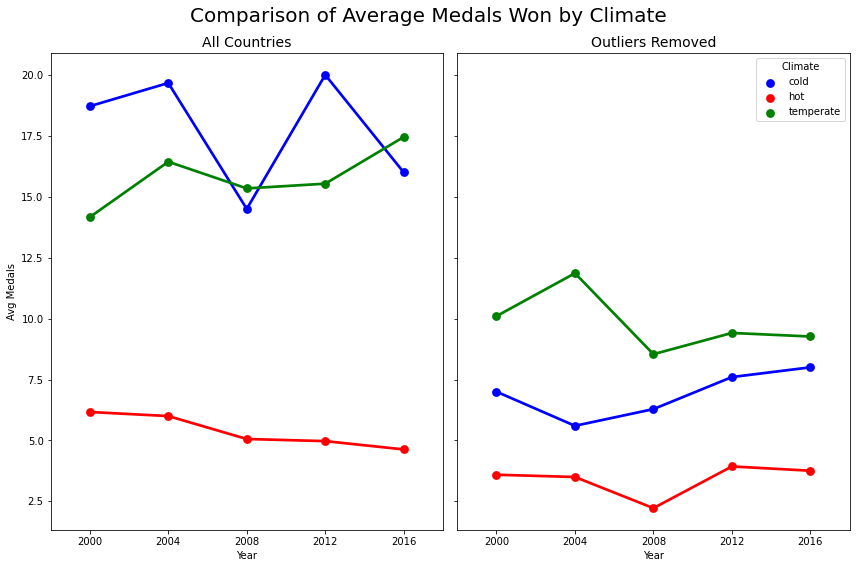

In [122]:
#Comparison of average medals with and without outliers
fig17, axs=plt.subplots(1,2,figsize=(12,8), sharey=True)
sns.pointplot(data=medals_summer[medals_summer['Year']>=2000],x='Year',y='Avg Medals', hue='climate', palette=temp_palette, ax=axs[0])
sns.pointplot(data=filtered_avg_medals[filtered_avg_medals['Season']=='Summer'],x='Year',y='Medal', hue='climate', palette=temp_palette, ax=axs[1])
axs[0].set_title('All Countries', fontsize=14)
axs[1].set_title('Outliers Removed', fontsize=14)
axs[0].legend().set_visible(False)
axs[1].legend().set_title('Climate')
axs[1].set_ylabel(None)
fig17.suptitle('Comparison of Average Medals Won by Climate', fontsize=20)
plt.tight_layout()
plt.show()

By removing outlying countries medal counts in each climate for each year of Olympics, we can see how the majority of countires in each climate perform. Here we can see that most temperate climate countries have performed the best and hot climate countries still perform worst, in the Olympics held this century. However, with the outliers removed, the dispairity of the avergae medals won between the hot climate and both cold and temperate is less pronounced. This does not tell the whole story though, as it explicitly removes the best performing countires in each climate. Instead, we will look to the performance of the top countries in each climate

## Top 5 Medal Count Countries

To analyze the success of countries in each climate, we will select the top 5 countries by medal count for each year and climate and analyze their performance.

In [123]:
#Group the country medals data frame by year, season and climate, and then seect the 5 largest countries 
#from each climate, year, and season. Place the year, season, climate, country, and medal count into top 5 data frame
top5_climate_medals=(
        country_medals.groupby(['Year', 'Season', 'climate'])
        .apply(lambda x: x.nlargest(5, 'Medal'))
        .reset_index(drop=True)
        [['Year', 'Season', 'climate', 'Country', 'Medal']]
        )

In [124]:
#Sample of the result for the 1992 games
top5_climate_medals[top5_climate_medals['Year']==1992]

,Year,Season,climate,Country,Medal
434,1992,Summer,cold,Canada,18
435,1992,Summer,cold,Sweden,12
436,1992,Summer,cold,Norway,7
437,1992,Summer,cold,Finland,5
438,1992,Summer,cold,Mongolia,2
439,1992,Summer,hot,Cuba,31
440,1992,Summer,hot,Australia,27
441,1992,Summer,hot,Kenya,8
442,1992,Summer,hot,Indonesia,5
443,1992,Summer,hot,Jamaica,4


1992 was the last year to have both Summer and Winter Games. There are 5 countries listed for each climate for Summer and for Winter the top 5 temperate, top 4 cold, and no hot climate countries.

In [125]:
#Subset the top 5 medal winners into summer and winter data frames
top5_medals_summer=pd.DataFrame(top5_climate_medals[top5_climate_medals['Season']=='Summer'].groupby(['Year','Season','climate'])['Medal'].sum())
top5_medals_summer.reset_index(inplace=True)
top5_medals_winter=pd.DataFrame(top5_climate_medals[top5_climate_medals['Season']=='Winter'].groupby(['Year','Season','climate'])['Medal'].sum())
top5_medals_winter.reset_index(inplace=True)

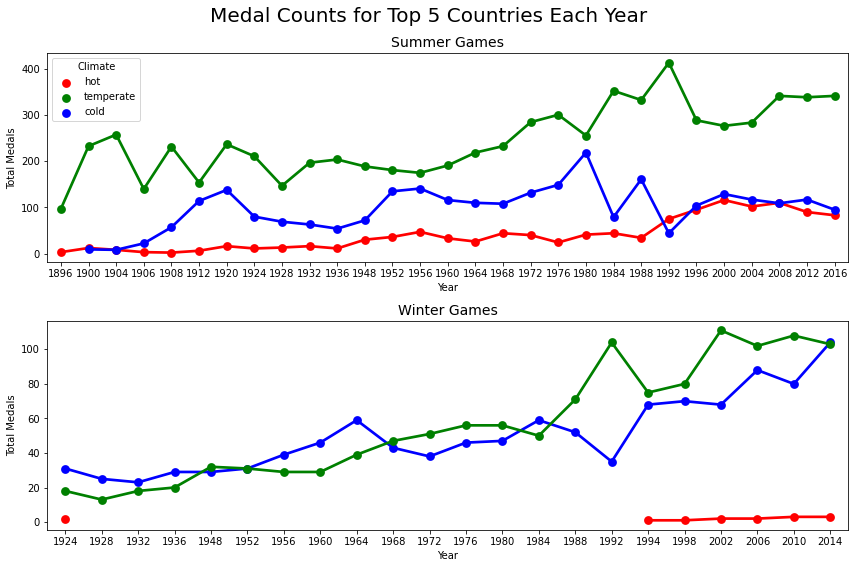

In [126]:
#Plot of the medal counts of the top 5 countries of each climate
fig18, axs= plt.subplots(2,1, figsize=(12,8))
sns.pointplot(data=top5_medals_summer, x='Year', y='Medal', hue='climate', palette=temp_palette, ci=None, ax=axs[0])
sns.pointplot(data=top5_medals_winter, x='Year', y='Medal', hue='climate', palette=temp_palette, ci=None, ax=axs[1])
axs[0].legend().set_title('Climate')
axs[1].legend().set_visible(False)
axs[0].set_ylabel('Total Medals')
axs[1].set_ylabel('Total Medals')
fig18.suptitle('Medal Counts for Top 5 Countries Each Year', fontsize=20)
axs[0].set_title('Summer Games', fontsize=14)
axs[1].set_title('Winter Games', fontsize=14)
plt.tight_layout()
plt.show()

#### Top 5 Medal Countries Result

By plotting only the top 5 medal earning countries of each climate each year can now see what climates have countries with the most success in each season's games.

In the Summer Games, we now see that the top temperate climate countries are consistently the most successful and by a good margin. Through most of the 1900's the top cold climate countries were more successful than hot climate. The top cold climate countries managed to produce nearly the amunt of medals of temperate countries in 1980, although this could be explained in part by the USA's boycott of the Summer Games in Moscow. In 1992, the top hot climate countries began to improve and have since drawn consistently even with cold climate countries over the past 6 Summer Games.

In the Winter Games, the top cold climate countries performed slightly better than the top temperate countries until 1964. Then, beginning in 1968 the top temperate climate countries began to take the lead. Over the history of the Winter Olympics, both the top temperate and cold climate countries have seen steady increase in their total medals. Overall, the top cold and temperate climate countries have performed fairly closely to each other. The one exception to this is the 1992 Games, where the top temperate countries drastically outperformed cold climate. Although hot climate countries have began to win medals in the past 6 Games, the success of the top hot climate countries is still far below that of the top temperate and cold climate countries.

In [127]:
team_medals[(team_medals['Year']==1988) & (team_medals['Season']=='Summer') & (team_medals['climate']=='hot') & (team_medals['Medal']!='NoMedal')].groupby('Sport')['Medal'].count().nlargest(5)
team_medals[(team_medals['Year']==1992) & (team_medals['Season']=='Summer') & (team_medals['climate']=='hot') & (team_medals['Medal']!='NoMedal')].groupby('Sport')['Medal'].count().nlargest(5)

Sport
Athletics    36
Boxing       16
Swimming     11
Judo          8
Wrestling     8
Name: Medal, dtype: int64

In 1992 at the Summer Games, hot climate countries doubled their success from 1988 in Track and Field, Boxing, and Swimming events.

In [128]:
team_medals[(team_medals['Year']==1988) & (team_medals['Season']=='Winter') & (team_medals['climate']=='temperate') & (team_medals['Medal']!='NoMedal')].groupby('Sport')['Medal'].count().nlargest(10)
team_medals[(team_medals['Year']==1992) & (team_medals['Season']=='Winter') & (team_medals['climate']=='temperate') & (team_medals['Medal']!='NoMedal')].groupby('Sport')['Medal'].count().nlargest(10)
team_medals[(team_medals['Year']==1988) & (team_medals['Season']=='Winter') & (team_medals['climate']=='cold') & (team_medals['Medal']!='NoMedal')].groupby('Sport')['Medal'].count().nlargest(10)
team_medals[(team_medals['Year']==1992) & (team_medals['Season']=='Winter') & (team_medals['climate']=='cold') & (team_medals['Medal']!='NoMedal')].groupby('Sport')['Medal'].count().nlargest(10)

Sport
Cross Country Skiing         10
Alpine Skiing                 6
Speed Skating                 5
Biathlon                      4
Short Track Speed Skating     3
Ski Jumping                   3
Figure Skating                1
Freestyle Skiing              1
Ice Hockey                    1
Nordic Combined               1
Name: Medal, dtype: int64

In 1992 Winter Games, temperate countries won 14 more medals in Cross Country Skiing, 9 more medals in Biathlon, and 7 more in Figure Skating than they won at 1988 Winter Games. This matches to the performance of cold climate countries in 1992, where they won 11 fewer medals in Cross Country Skiing and 7 fewer in Figure Skating.

In [129]:
team_medals[(team_medals['climate']=='hot') & (team_medals['Season']=='Winter')].groupby(['Country', 'Medal'])['Team'].count()
team_medals[(team_medals['climate']=='hot') & (team_medals['Season']=='Winter') & (team_medals['Medal']!='NoMedal')][['Team','Games','Sport','Event','Medal']]


,Team,Games,Sport,Event,Medal
17569,Australia,2006 Winter,Freestyle Skiing,Freestyle Skiing Men's Moguls,Gold
17570,Australia,2010 Winter,Freestyle Skiing,Freestyle Skiing Men's Moguls,Silver
27955,Australia,1994 Winter,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
27960,Australia,2002 Winter,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",Gold
29192,Australia,2010 Winter,Snowboarding,Snowboarding Women's Halfpipe,Gold
29194,Australia,2014 Winter,Snowboarding,Snowboarding Women's Halfpipe,Silver
34464,Australia,2002 Winter,Freestyle Skiing,Freestyle Skiing Women's Aerials,Gold
34465,Australia,2006 Winter,Freestyle Skiing,Freestyle Skiing Women's Aerials,Bronze
69407,Australia,1924 Winter,Alpinism,Alpinism Mixed Alpinism,Gold
102058,Australia,2010 Winter,Freestyle Skiing,Freestyle Skiing Women's Aerials,Gold


At the Winter Games, Australia has won 13 (6 gold, 3 silve, 4 bronze) of the medals for hot climate countries and India has won 1 gold medal. India's medal was in Mixed Alpinism at the 1924 Games. At the same games, Australia won a gold in the same event. More recently, Australia has won medals in Alpine Skiing, Freestyle Skiing, Snowboarding, and Short Track Speed Skating.

In [130]:
top5_climate_medals[top5_climate_medals['Season']=='Summer'].groupby(['Country','climate'])['Country'].count().nlargest(10)

Country                   climate  
United States of America  temperate    28
Australia                 hot          27
Canada                    cold         27
Sweden                    cold         27
Germany                   temperate    25
Finland                   cold         24
Norway                    cold         24
France                    temperate    18
Russia                    cold         17
Brazil                    hot          15
Name: Country, dtype: int64

Through 2016, the Summer Games have been held 28 times. At the Summer Games, the USA (28), Germany (25), and France (18) are the temperate countries which have been in the top 5 of medal count of temperate countries the most times. Australia (27) and Brazil (15) are the hot climate countries with the most success. For cold climate countries, Canada (27), Sweden (27), Finland (24), Norway (24), and finally Russia (17) have had the most consistent success.

In [131]:
top5_climate_medals[top5_climate_medals['Season']=='Winter'].groupby(['Country','climate'])['Country'].count().nlargest(10)

Country                   climate  
Canada                    cold         22
Finland                   cold         22
Norway                    cold         22
Sweden                    cold         22
Austria                   temperate    21
United States of America  temperate    21
Germany                   temperate    19
Russia                    cold         15
Switzerland               temperate    12
France                    temperate    11
Name: Country, dtype: int64

Through 2016, the Winter Games had been held 22 times. The cold climate countries which appeared in the top 5 of cold climate medal count the most times were Canada, Finland, Norway, and Sweden, all appearing the top 5 each time. Temperate climate countries with the most consistent success are Austria and the USA both with 21 and Gemrany with 19 times. For hot climate countries, Australia and India are the only countries which have won medals.

# Conclusion

#### *Does a country's climate affect it's likelihood to participate in the Olympics?*

Our assumption was that hot climate countries would be more likely to participate in Summer Games than Winter Games, and that cold climate countries would be more active in the Winter Games than Summer. 

This does seem to hold for the hot climate countries, where they have dramatically higher participation rates in the Summer Games than the Winter Games. However, cold climate countries have historically had strong participation in the Summer Games, rivaling that of temperate climate countries, and continue to have high participation rates to present day. Temperate climate countries have consistently been high participants in both games. So, our assumption does seem to hold for hot climate countries but not necessarily for cold climate countries.

Over the history of the modern Olympic Games, the participation of all countries has increased. As the games gained popularity and recognition, countries of all climates began to participate more and we see increased participation in games of the opposite climate. This is particularly true of the Winter Games, where hot climate countries had virtually no participation until 1980. While temperate climate had around 40% participation in the Winter Games until the 1980's, they have had strong participation in both games. A bit surprisingly is the participation rate of cold climate coutries in the Summer Games. Their participation in the Summer Games has been historical near that of temperate climate countries, but more recently has plateaued while temperate countries continued to increase. The Summer Games are more popular and this is driven mostly by the higher rate of participation by the large number of hot climate countries.

#### *Is a country's climate an indicator of success in the Olympic Games?*

Our assumption was similar to the previous research question. Cold climate countries would tend to be more successful, in terms of medals, at the Winter Games and less successful at the Summer Games. While expecting the oposite to be true for hot climate countries.

Here again, this seems to be true for hot climate countries. Hot climate countries have more medal success at the Summer Games and until the 1994 Winter Games had no medal success. In the past, 6 Winter Games hot climate countries have won a limited number of medals. However, hot climate countries lag far behind other climates in terms of average number of medals won at the Summer Games. We were not surprised to find that the cold climate countries have the most success at the Winter Games. However, we were again surprised to find the rate of success thatt cold climate countries have had at the Summer Games. Historically cold climate countries actually won more medals on average than the temperate climate countries and even recently are winning the same number as the temperate climate countries.

Temperate climate countries have by far experienced the most success at the Summer Games. Recently, since 1988, they have also had the most success in total at the Winter Games. Cold climate countries historically had the most success at the Winter Games, but have also had good success at the Summer Games. When we look at the average number of medals won, because there are so few cold climate countries, we can see that cold climate countries have experienced more success than either hot or temperate climate countries. As expected, hot climate countries have struggled at the Winter Games. Even though there are 10 times as many hot climate countries as cold climate countries by our model, they have only recently surpassed the cold climate countries in total success at the Summer Games. They continue to lag behind both cold and temperate climate countries in terms of average medals won at both games.

At the Summer Games, the top 5 temperate countries each year have about 3 times as many medals as either the top 5 cold or hot climate countries. The top 5 cold climate countries have historically more medals than hot countries and more recently they are performing equally at the Summer Games. At the Winter Games, the top 5 temperate and cold climate countries performed equally, with a few exceptions.

#### Final Comments

In conclusion, in terms of participation hot climate countries tend to participate more in the Summer Games and see more success at the Summer Games, but both their participation and success is much lower than either the temperate or cold climate countires. This does not appear to extend to cold climate countries. Temperate and cold climate countries have strong participation at both the Summer and Winter Games. In terms of success, while temperate climate countries have had more total medals at both the Summer and Winter Games, this can be attributed in part due to the higher number of temperate climate countries in our model. When observing the average number of medals, the cold climate countries have more success than temperate countries. The top performing temperate countries have more success at the Summer Games and equal success at the Winter Games. This indicates that temperate and cold climate countries are more likely to have success at the Olympic Games than hot climate countries. 

However, it is important to note, as with many global phenomena, climate is likely not the only indicator of success at the Olympics. The lack of both participation and success of hot climate countries and the participation rates and higher success of cold and temperate climate countries may very likely have other factors. Some of those reasons, which are not explored in this analysis, could be population, GDP, political structure, and economic development status.